## Case Study : Brazil Housing

#### Import necessary libraries

In [1]:
import matplotlib.pyplot as plt             # to visualize
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading or create the dataframe
import numpy as np                          # for numerical computation
from tabulate import tabulate               # to print the table

#### Read the file

In [2]:
housing_data = pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
housing_data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


### Level 0 Analysis: Understanding Data

In [3]:
# 1. Read the top 5 rows
housing_data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
# 1. Read the bottom 5 rows
housing_data.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [5]:
# 2. Check the shape, i.e number of rows and columns
housing_data.shape

(10692, 13)

In [6]:
# 3. Check the columns, display the name of all the columns 
housing_data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [7]:
# 4. Nature of dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [8]:
# 5. Check the null values
housing_data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

#### Interpretation : 
* 1. There are 10692 rows and 13 columns in the dataset.
* 2. There are no null values.

### Level 1 Analysis : Univariate Analysis

* Separate the Numerical and Categorical columns

In [3]:
# Numerical Columns
Numerical = housing_data.select_dtypes(exclude = "object")
# Categorical Columns
Categorical = housing_data.select_dtypes(include = "object")

In [4]:
# Convert numerical columns to a list
Numerical_list = list(Numerical.columns)
Numerical_list

['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'floor',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [5]:
# Convert categorical columns to a list
Categorical_list = list(Categorical.columns)
Categorical_list

['city', 'animal', 'furniture']

In [6]:
# Print the list of categorical and numerical columns in tabular form
table = [Numerical_list, Categorical_list]
print(tabulate({"Categorical Column ": Categorical_list,
                "Numerical Column" : Numerical_list}, headers = ["Categorical Column", "Numerical Column"]))

Categorical Column    Numerical Column
--------------------  -------------------
city                  area
animal                rooms
furniture             bathroom
                      parking spaces
                      floor
                      hoa (R$)
                      rent amount (R$)
                      property tax (R$)
                      fire insurance (R$)
                      total (R$)


* Interpretation : There are 3 categorical columns and 10 numerical columns.

## Univariate Analysis of Categorical Columns

In [3]:
# Define a function that will check for the Unique values, Mode and Total count of missing values.
def info_of_cat(col):
    print("Total Unique Values :",housing_data[col].nunique())      # unique: returns the unique values in the col
    print("Mode Value :",housing_data[col].mode()[0])               # mode: returns the mode of the column
    print("Null Values:",housing_data[col].isnull().sum())          # isnull().sum() counts the number of null values in dataframe

##### Function for Percentage labels on top of bar

In [8]:
def bar_percentage(ax, count = "number of rows in the data set"):
    for bar in ax.patches:                                              
        percentage = f"{round(bar.get_height() /len(housing_data) * 100, 2)}%"          

        x = bar.get_x() + bar.get_width() /2                            
        y = bar.get_height()                                            
        ax.annotate(percentage, (x, y), va = "bottom", ha ="center" ) 
plt.show() 

### 1. Analysis of 'city' column

In [15]:
info_of_cat("city")

Total Unique Values : 5
Mode Value : São Paulo
Null Values: 0


* City is nominal datatype.

### Visual presentation of 'city' column

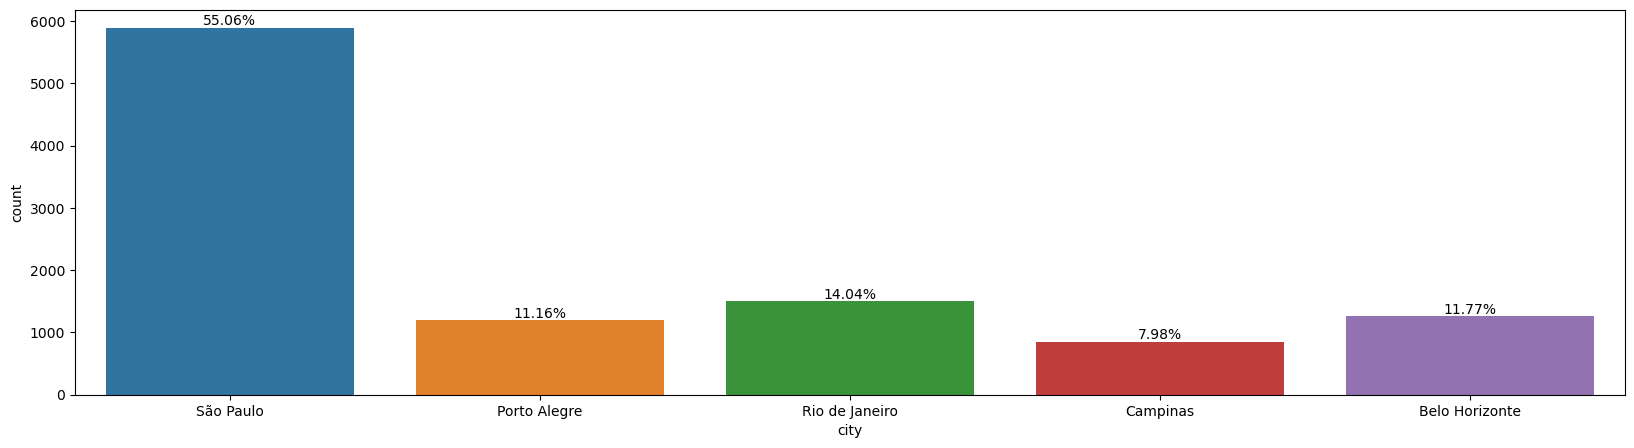

In [16]:
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.countplot(x=housing_data["city"])
bar_percentage(ax,len(housing_data))

* Interpretation : Maximum number of people are living in Sao Paulo City and least number of people are living in Campinas City.

### 2. Analysis of 'animal' column

In [17]:
info_of_cat("animal")

Total Unique Values : 2
Mode Value : acept
Null Values: 0


### Visual presentation of 'animal' column

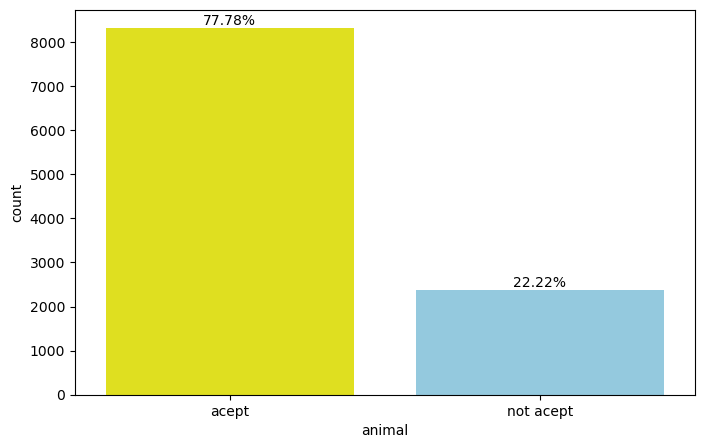

In [29]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.countplot(x=housing_data["animal"],palette={'acept': 'yellow', 'not acept': 'skyblue'})
bar_percentage(ax,len(housing_data))

* Interpretation : 78 % of the societies allow to keep animals as pets rest 22% do not allow pets.

### 3. Analysis of 'furniture' column

In [19]:
info_of_cat("furniture")

Total Unique Values : 2
Mode Value : not furnished
Null Values: 0


### Visual presentation of 'furniture' column

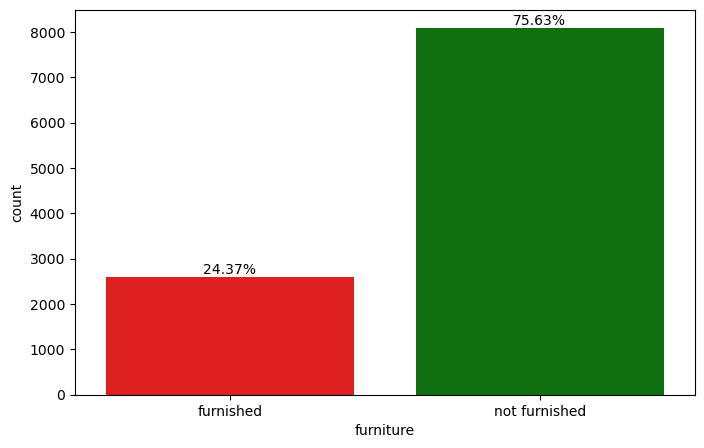

In [20]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.countplot(x=housing_data["furniture"],palette={'furnished': 'red', 'not furnished': 'green'})
bar_percentage(ax,len(housing_data))

* Interpretation : 76% of the houses are not furnished rest 24% of the houses are furnished.

## Univariate Analysis of Numerical Columns

In [4]:
# Define a function that will calculate the mean, median, standard deviation and check for null values.
def info_of_num(col):
    print("Mean:", housing_data[col].mean())
    print("Median:", housing_data[col].median())
    print("Std:", housing_data[col].std())
    print("Null values: ",housing_data[col].isnull().sum())

##### Function for plotting histogram and box plot.

In [5]:
def hist_box(col):
    fig,ax= plt.subplots(1,2, figsize =(20,7))
    sns.histplot(x = housing_data[col], ax = ax[1],color = 'g')
    sns.boxplot(x = housing_data[col], ax = ax[0],color = 'b')
    plt.show()

### 1. Analysis of 'area' column

In [11]:
info_of_num("area")

Mean: 149.21791994014217
Median: 90.0
Std: 537.0169423364867
Null values:  0


### Visual presentation of 'area' column

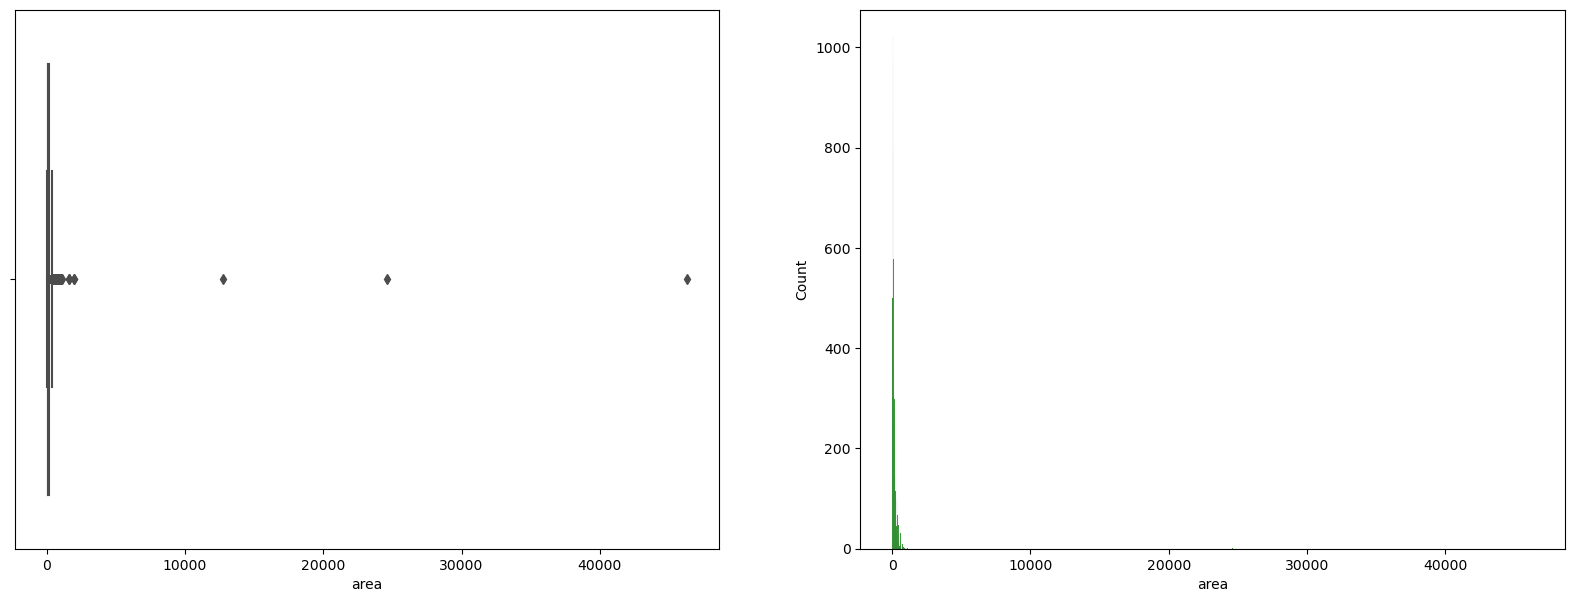

In [12]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["area"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["area"], ax = ax[0],color = 'b')
plt.show()

* Outliers Treatment

In [13]:
#1 Calculate mean 
mean = int(housing_data["area"].mean())
mean

149

In [26]:
#2 Index
x = housing_data[housing_data["area"] > 300].index
x

Index([    1,    15,    34,    91,   109,   169,   267,   268,   285,   292,
       ...
       10467, 10488, 10554, 10558, 10581, 10590, 10593, 10606, 10664, 10669],
      dtype='int64', length=313)

In [27]:
#3 Replace the mean value
for index in x:
    housing_data.loc[index, "area"] = mean

In [28]:
info_of_num("area")

Mean: 111.2350355405911
Median: 90.0
Std: 68.71521916324794
Null values:  0


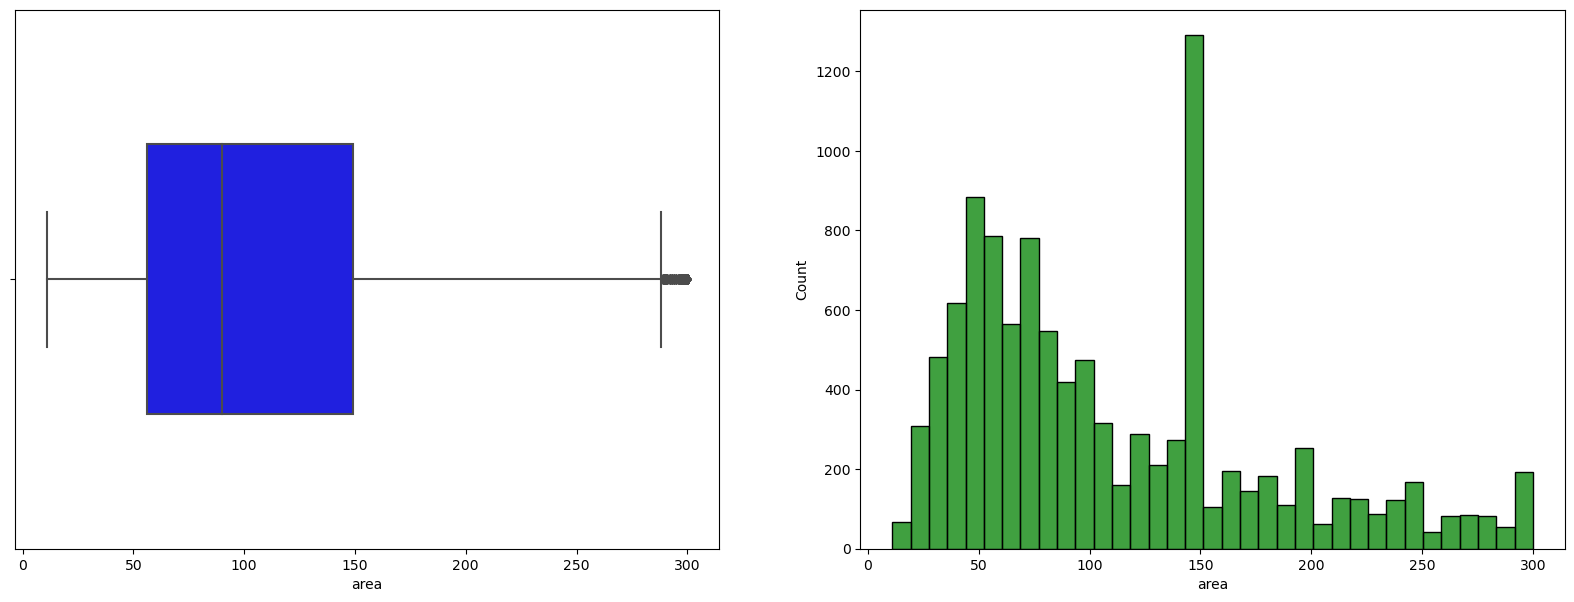

In [29]:
# Distribution of Area (Outlier Analysis)
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["area"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["area"], ax = ax[0],color = 'b',width=0.5)
plt.show()

* Interpretation : This is right skewed data because most of the values lies on the left side.The maximum values of area lies between 0 and 300 square metres.

### 2. Analysis of  'rooms' column

* There are very less variations in this column. It would be better to treat 'room' column as a categorical column rather than numerical one. Treating it as categorical and then presenting it visually is more relevant.

In [26]:
info_of_cat("rooms")

Total Unique Values : 11
Mode Value : 3
Null Values: 0


### Visual presentation of 'rooms' column

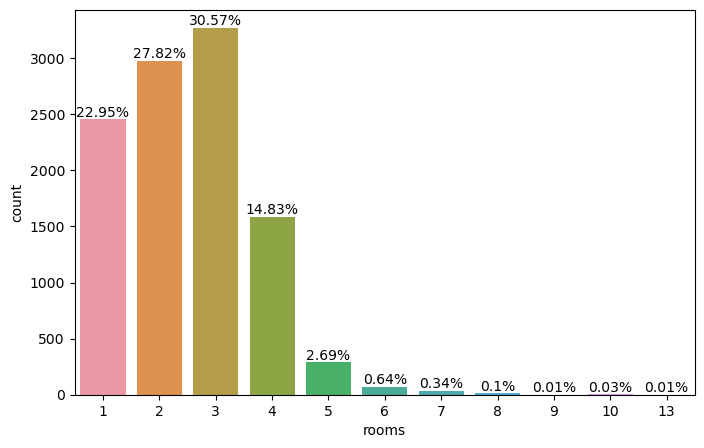

In [27]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.countplot(x=housing_data["rooms"])
bar_percentage(ax,len(housing_data))

* Interpretation : There are 31% houses which have 2 rooms and 30% houses which have 3 rooms.

### 3. Analysis of 'bathroom' column

* There are very less variations in this column. It would be better to treat 'bathroom' column as a categorical column rather than numerical one. Treating it as categorical and then presenting it visually is more relevant.

In [28]:
info_of_cat("bathroom")

Total Unique Values : 10
Mode Value : 1
Null Values: 0


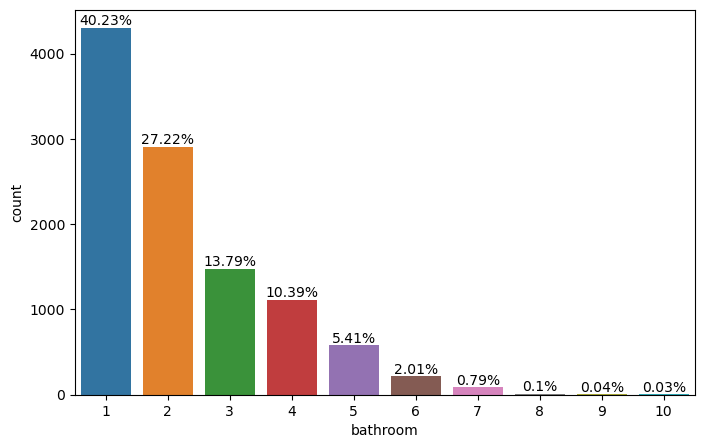

In [29]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.countplot(x=housing_data["bathroom"])
bar_percentage(ax,len(housing_data))

* Interpretation : There are 40% houses which have 1 bathroom and there are very less houses which have more than 4 bathrooms.

### 4. Analysis of 'parking spaces' column

* There are very less variations in this column. It would be better to treat 'parking spaces' column as a categorical column rather than numerical one. Treating it as categorical and then presenting it visually is more relevant.

In [30]:
info_of_cat("parking spaces")

Total Unique Values : 11
Mode Value : 1
Null Values: 0


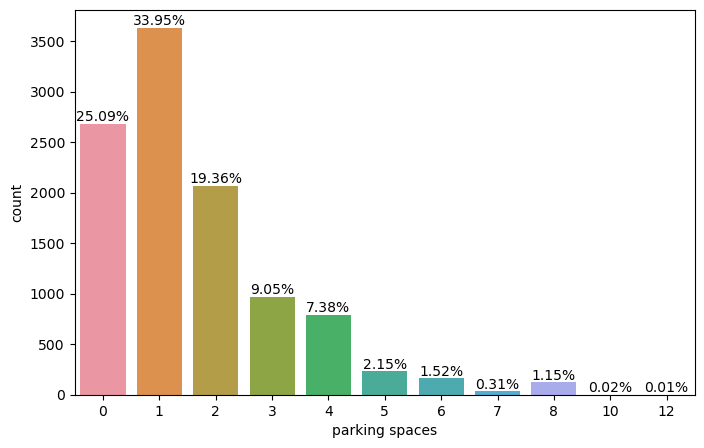

In [31]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.countplot(x=housing_data["parking spaces"])
bar_percentage(ax,len(housing_data))

* Interpretation : The data shows almost 55 % of Bulidings have parking space of either 0 or 1.

### 5. Analysis of 'hoa' column

In [30]:
info_of_num("hoa (R$)")

Mean: 1174.0216984661429
Median: 560.0
Std: 15592.305248403356
Null values:  0


### Visual presentation of 'hoa' column

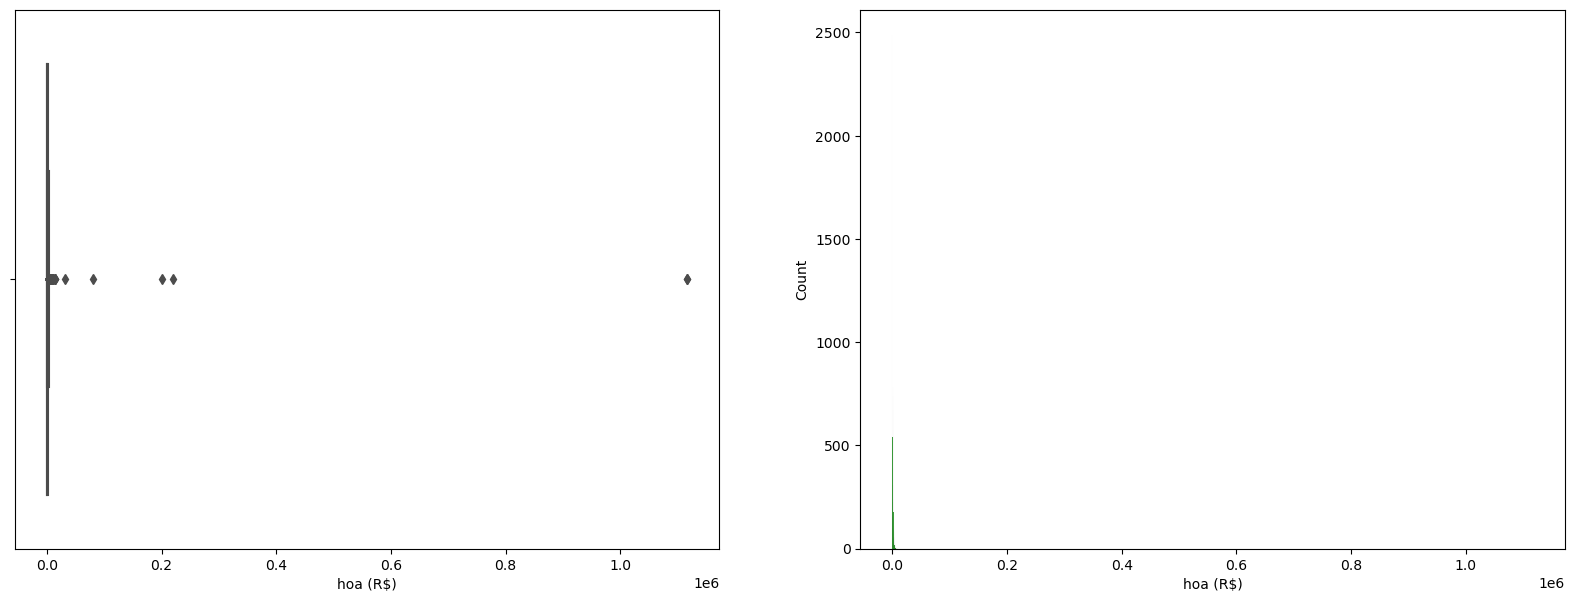

In [41]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["hoa (R$)"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["hoa (R$)"], ax = ax[0],color = 'b')
plt.show()

* Outliers Treatment

In [31]:
#1 Calculate mean 
mean = int(housing_data["hoa (R$)"].mean())
mean

1174

In [36]:
#2 Index
x = housing_data[housing_data["hoa (R$)"] > 2500].index
x

Index([  109,   127,   168,   191,   251,   268,   270,   346,   350,   359,
       ...
       10309, 10330, 10388, 10399, 10419, 10447, 10450, 10534, 10618, 10662],
      dtype='int64', length=310)

In [37]:
#3 Replace the mean value
for index in x:
    housing_data.loc[index, "hoa (R$)"] = mean

In [38]:
info_of_num("hoa (R$)")

Mean: 700.2065095398428
Median: 560.0
Std: 631.5674194388984
Null values:  0


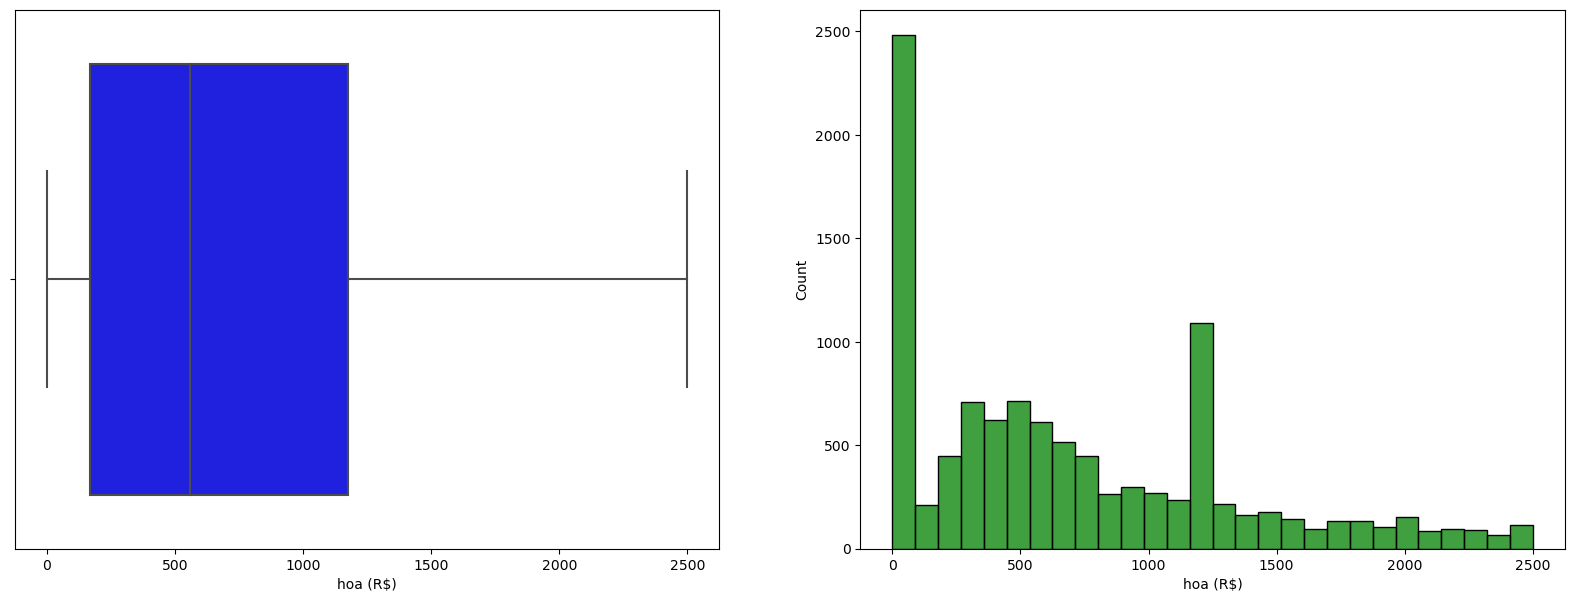

In [39]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["hoa (R$)"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["hoa (R$)"], ax = ax[0],color = 'b')
plt.show()

* Interpretation : The maximum amount of HOA is between 0- 2500.

### 6. Analysis of 'rent amount' column

In [35]:
info_of_num("rent amount (R$)")

Mean: 3896.247194163861
Median: 2661.0
Std: 3408.5455176710816
Null values:  0


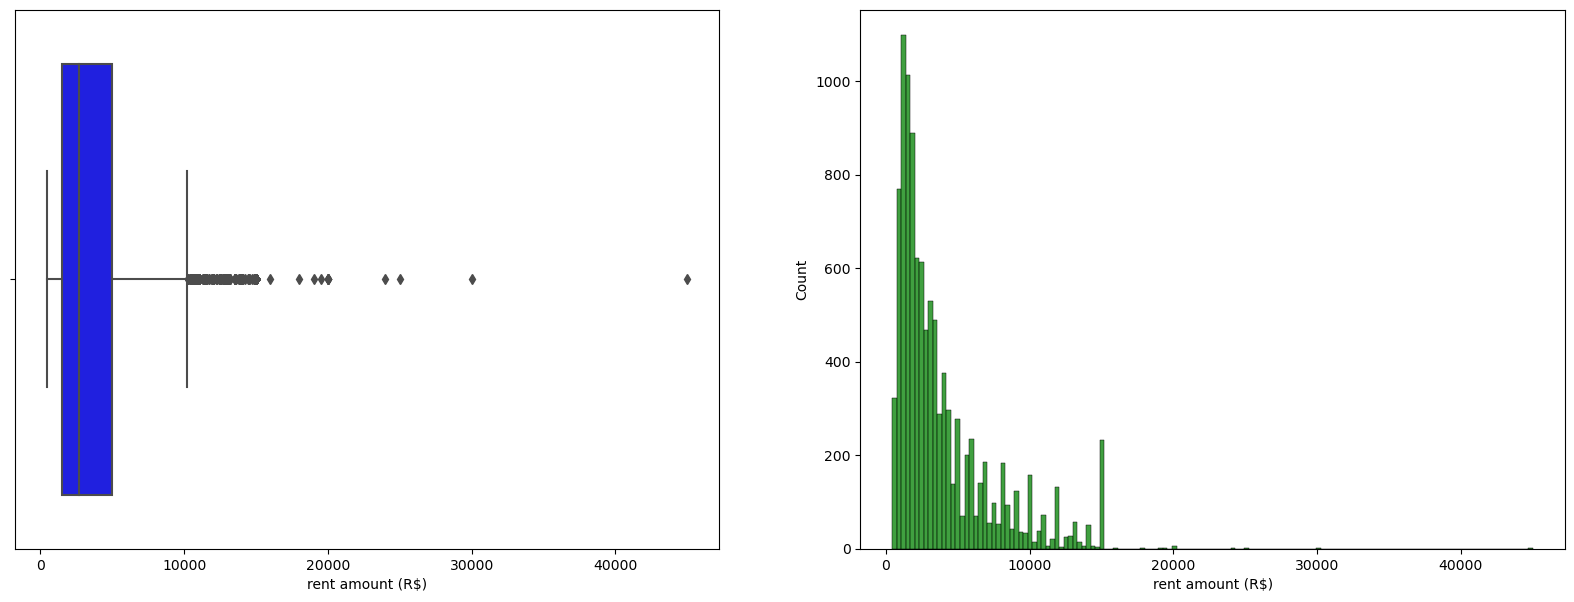

In [4]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["rent amount (R$)"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["rent amount (R$)"], ax = ax[0],color = 'b')
plt.show()

* Outliers Treatment

In [5]:
#1 Calculate mean 
mean = int(housing_data["rent amount (R$)"].mean())
mean

3896

In [6]:
#2 Index
x = housing_data[housing_data["rent amount (R$)"] > 7000].index
x

Index([    5,     8,    15,    19,    37,    40,    55,    63,    75,    86,
       ...
       10646, 10650, 10653, 10669, 10678, 10681, 10685, 10686, 10688, 10690],
      dtype='int64', length=1601)

In [7]:
#3 Replace the mean value
for index in x:
    housing_data.loc[index, "rent amount (R$)"] = mean

In [10]:
info_of_num("rent amount (R$)")

Mean: 2874.8981481481483
Median: 2661.0
Std: 1543.48172262827
Null values:  0


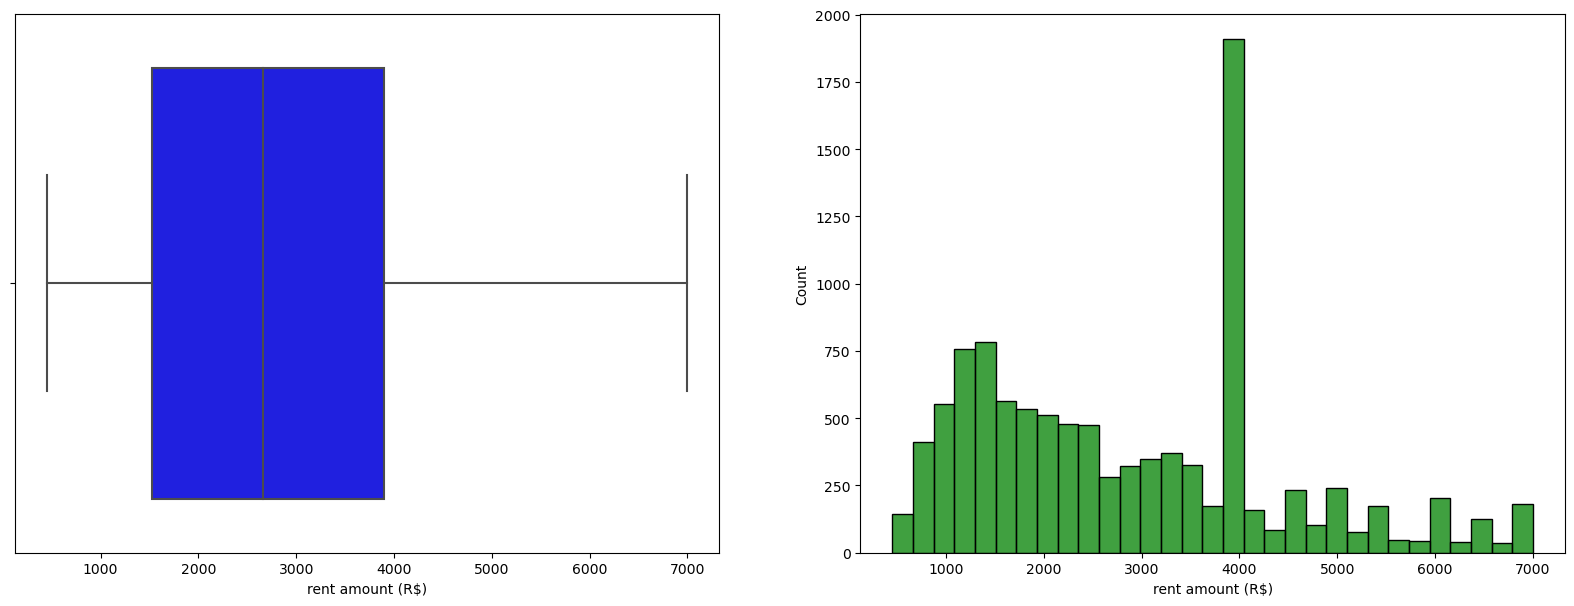

In [52]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["rent amount (R$)"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["rent amount (R$)"], ax = ax[0],color = 'b')
plt.show()

* Interpretation : This is a right skewed data because most of the values lies on the left side.

### 7. Analysis of 'property tax' column

In [38]:
info_of_num("property tax (R$)")

Mean: 366.70435839880287
Median: 125.0
Std: 3107.832321161917
Null values:  0


### Visual presentation of 'property tax' column

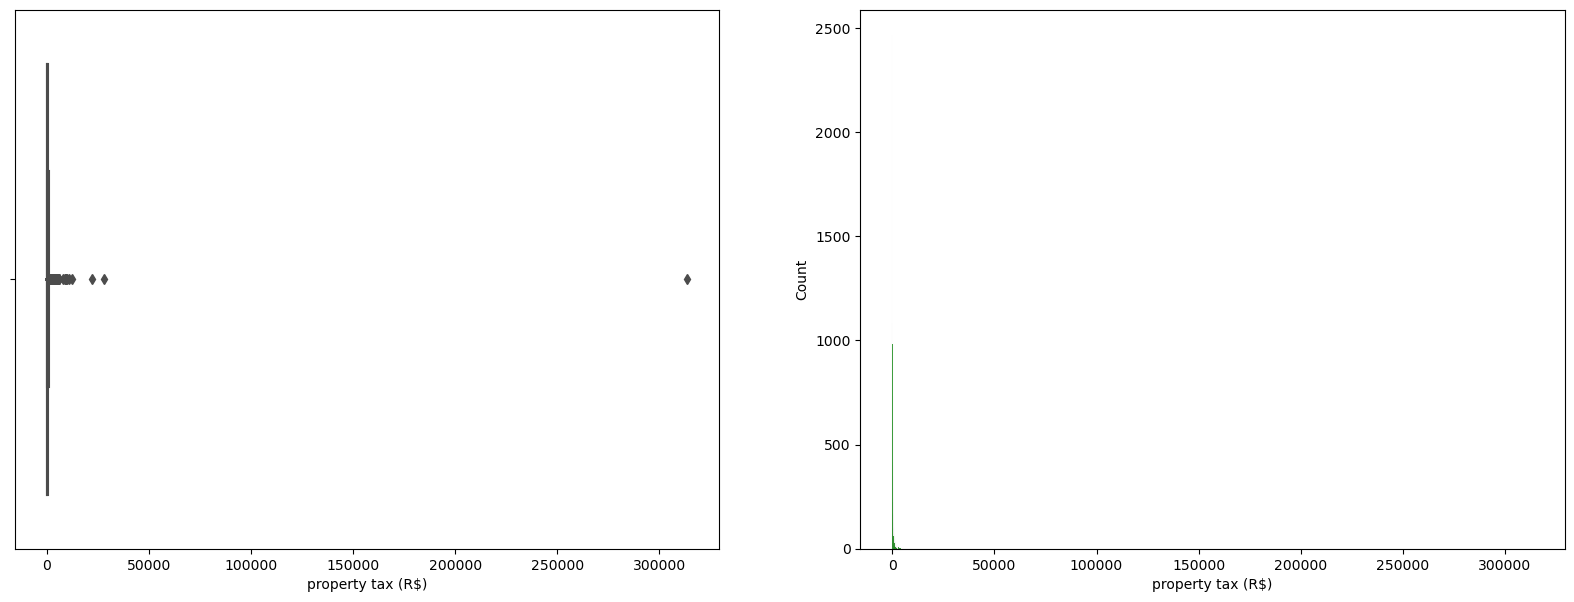

In [48]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["property tax (R$)"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["property tax (R$)"], ax = ax[0],color = 'b')
plt.show()

* Outliers Treatment

In [24]:
#1 Calculate mean 
mean = int(housing_data["property tax (R$)"].mean())
mean

222

In [29]:
#2 Index
x = housing_data[housing_data["property tax (R$)"] > 700].index
x

Index([   55,    88,   114,   263,   276,   300,   307,   346,   471,   526,
       ...
       10125, 10204, 10220, 10269, 10353, 10533, 10612, 10633, 10678, 10680],
      dtype='int64', length=190)

In [30]:
#3 Replace the mean value
for index in x:
    housing_data.loc[index, "property tax (R$)"] = mean

In [31]:
info_of_num("property tax (R$)")

Mean: 189.44584736251403
Median: 125.0
Std: 184.6135182537559
Null values:  0


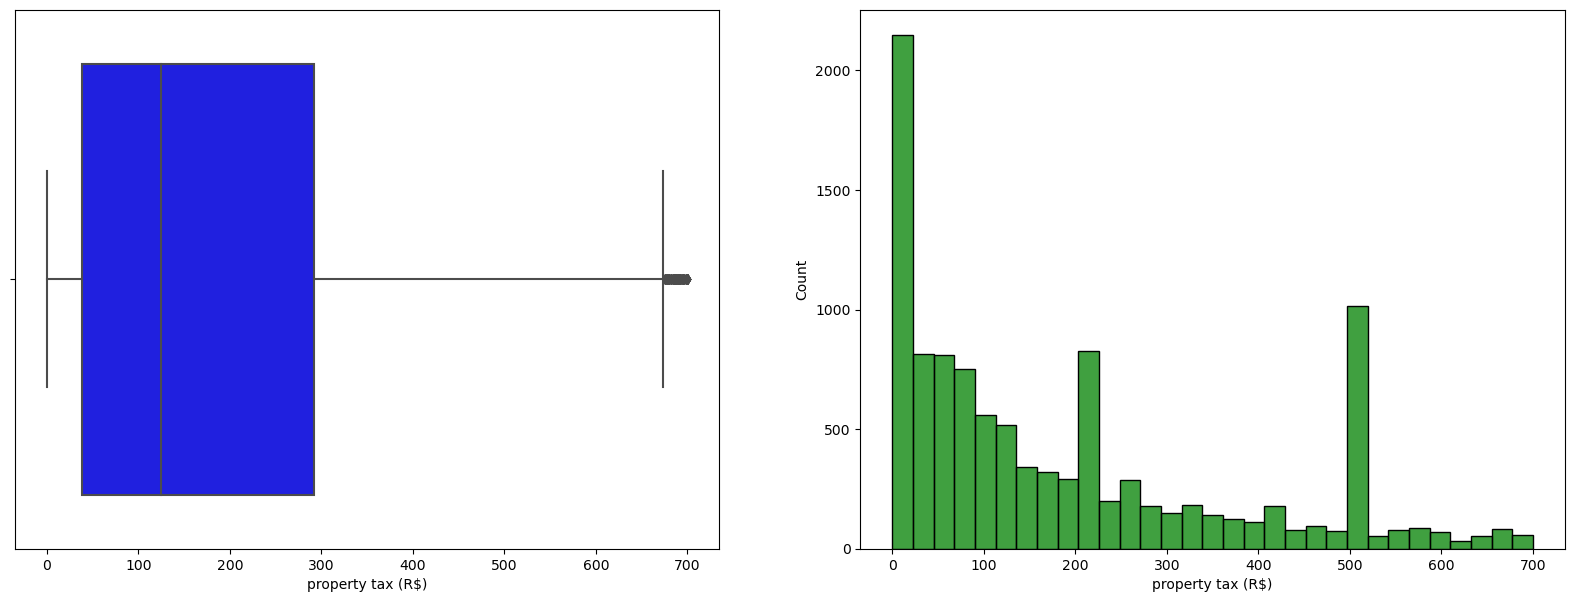

In [32]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["property tax (R$)"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["property tax (R$)"], ax = ax[0],color = 'b')
plt.show()

* Interpretation : This is a right skewed data because most of the values lies on the left side.

### 8. Analysis of 'fire insurance' column

In [41]:
info_of_num("fire insurance (R$)")

Mean: 53.300879161990274
Median: 36.0
Std: 47.768030930197206
Null values:  0


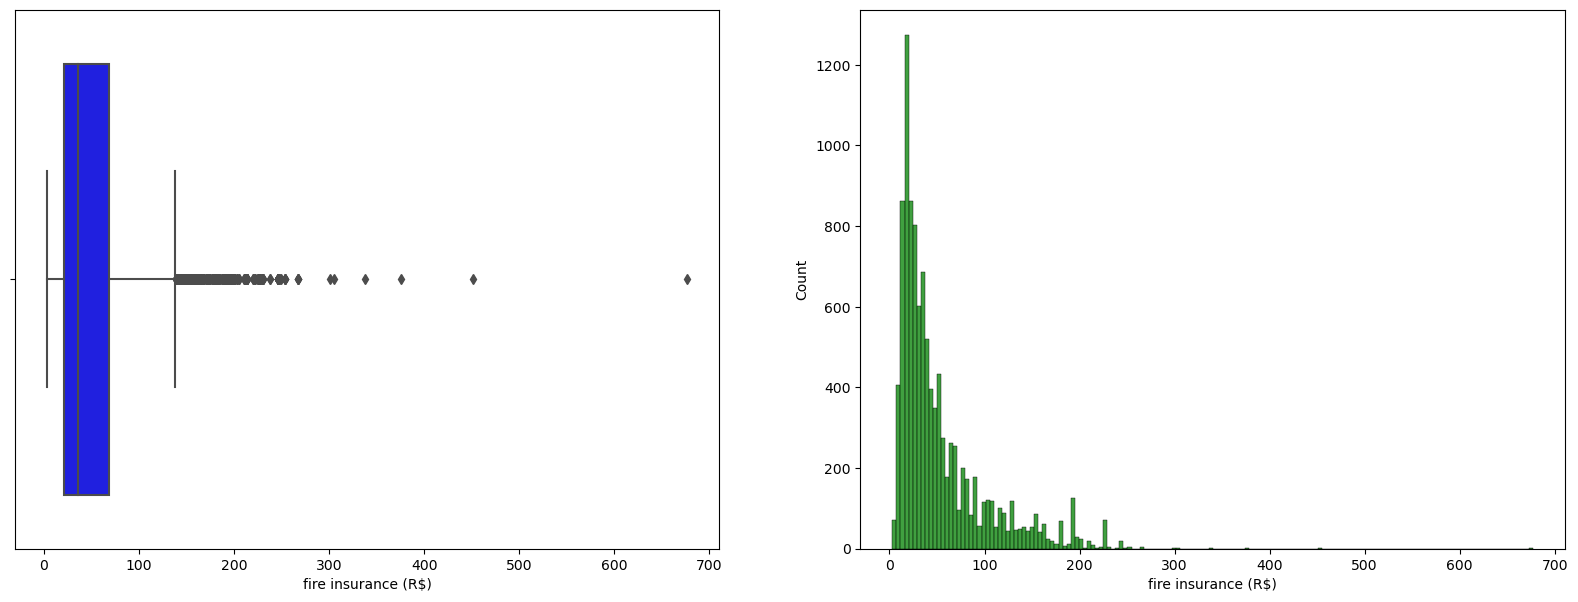

In [33]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["fire insurance (R$)"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["fire insurance (R$)"], ax = ax[0],color = 'b')
plt.show()

* Outliers Treatment

In [34]:
#1 Calculate mean 
mean = int(housing_data["fire insurance (R$)"].mean())
mean

53

In [39]:
#2 Index
x = housing_data[housing_data["fire insurance (R$)"] > 100].index
x

Index([    5,    15,    55,    63,    75,    86,    90,   111,   133,   161,
       ...
       10590, 10593, 10603, 10613, 10637, 10646, 10650, 10653, 10678, 10681],
      dtype='int64', length=862)

In [40]:
#3 Replace the mean value
for index in x:
    housing_data.loc[index, "fire insurance (R$)"] = mean

In [41]:
info_of_num("fire insurance (R$)")

Mean: 39.12008978675645
Median: 36.0
Std: 21.35909205172699
Null values:  0


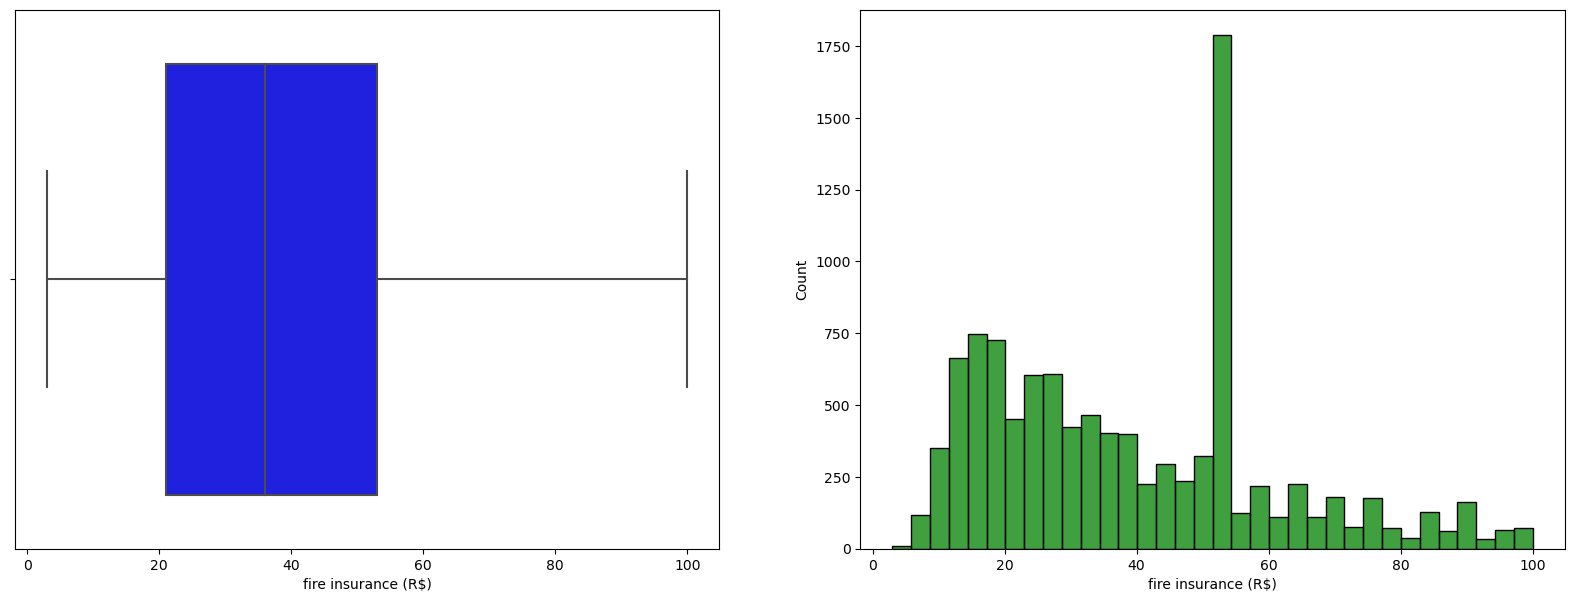

In [42]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["fire insurance (R$)"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["fire insurance (R$)"], ax = ax[0],color = 'b')
plt.show()

* Interpretation : This is a right skewed data because most of the values lies on the left side.

### 9. Analysis of 'total' column

In [44]:
info_of_num("total (R$)")

Mean: 5490.4869996258885
Median: 3581.5
Std: 16484.72591235027
Null values:  0


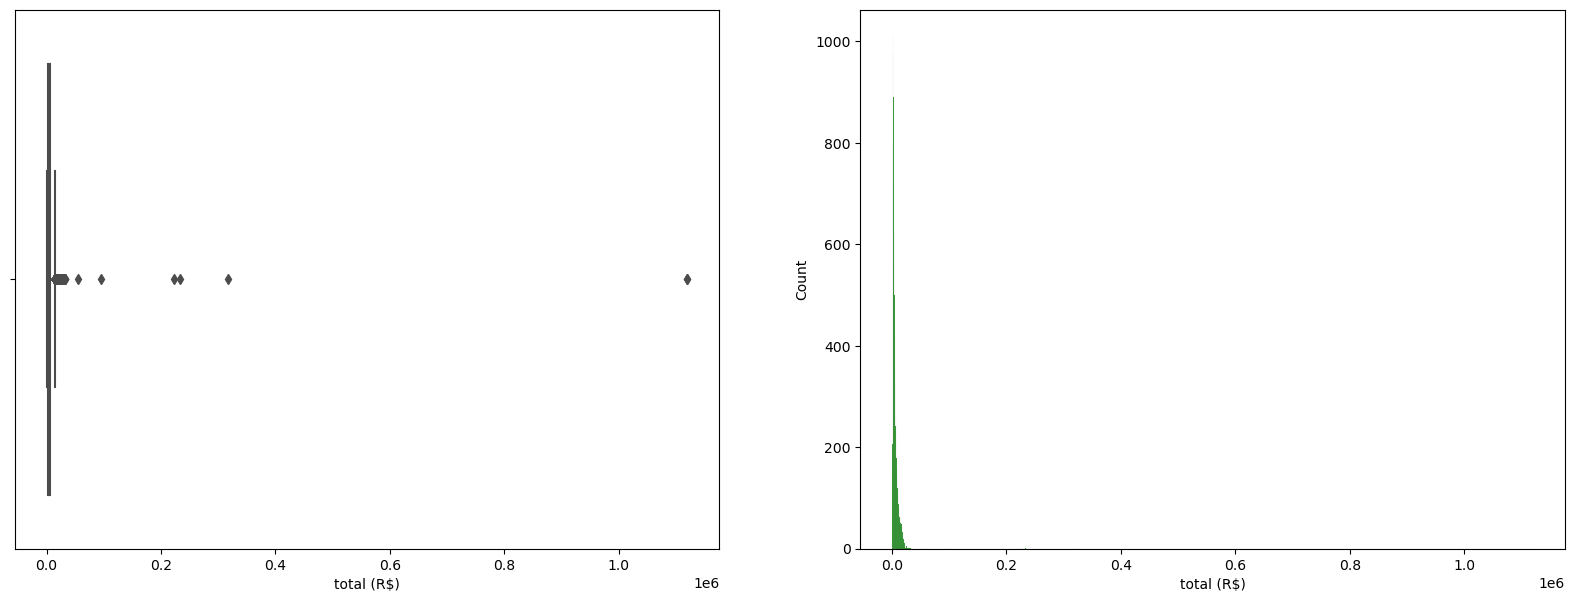

In [43]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["total (R$)"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["total (R$)"], ax = ax[0],color = 'b')
plt.show()

* Outliers Treatment

In [44]:
#1 Calculate mean 
mean = int(housing_data["total (R$)"].mean())
mean

5490

In [53]:
#2 Index
x = housing_data[housing_data["total (R$)"] > 10000].index
x

Index([   37,    44,    55,   126,   133,   144,   169,   191,   285,   304,
       ...
       10426, 10450, 10466, 10506, 10531, 10618, 10637, 10646, 10650, 10678],
      dtype='int64', length=577)

In [54]:
#3 Replace the mean value
for index in x:
    housing_data.loc[index, "total (R$)"] = mean

In [55]:
info_of_num("total (R$)")

Mean: 3966.127665544332
Median: 3581.5
Std: 2213.788843786331
Null values:  0


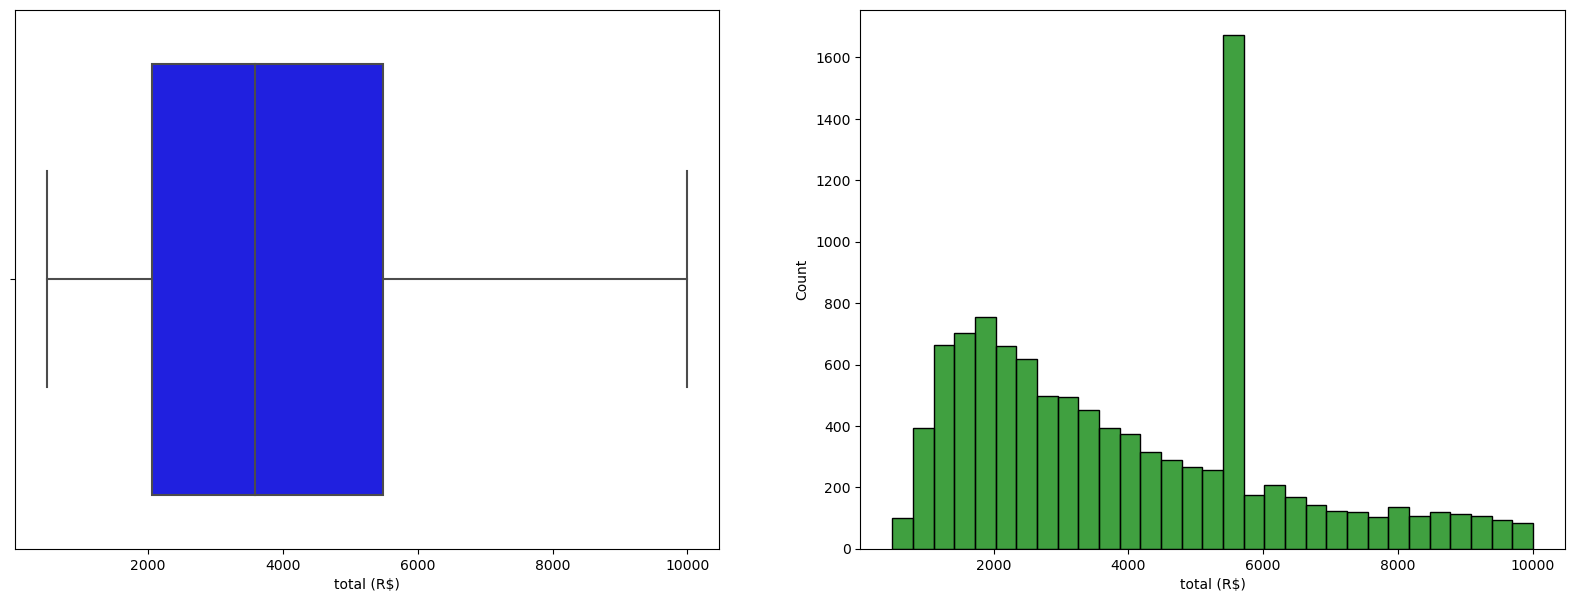

In [56]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["total (R$)"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["total (R$)"], ax = ax[0],color = 'b')
plt.show()

* Interpretation : Most of the total values are less than 10000

### 10. Analysis of 'floor' column

In [47]:
info_of_num("floor")

Mean: 5.0679947624392065
Median: 3.0
Std: 6.069050243218268
Null values:  0


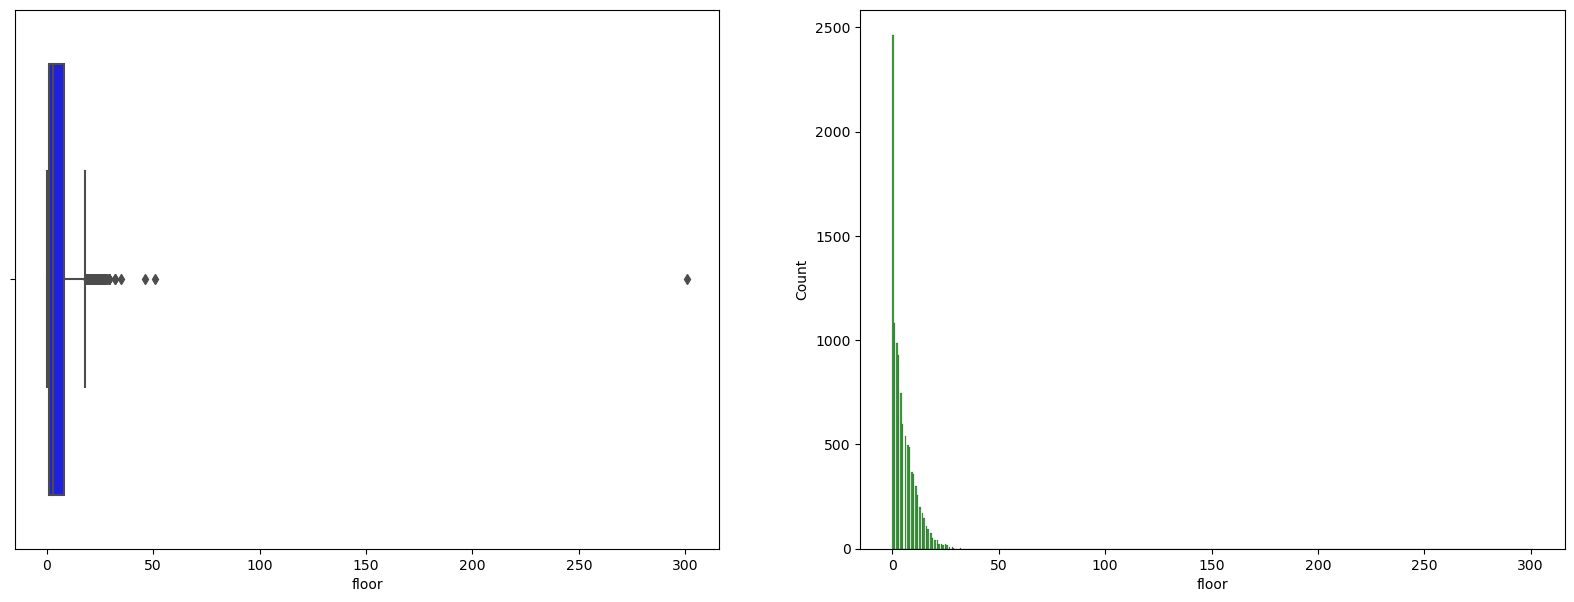

In [58]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["floor"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["floor"], ax = ax[0],color = 'b')
plt.show()

* Outlier Treatment

In [9]:
#1 Calculate mean 
mean = int(housing_data["floor"].mean())
mean

5

In [10]:
#2 Index
x = housing_data[housing_data["floor"] > 20].index
x

Index([   14,    99,   138,   172,   274,   322,   323,   346,   355,   438,
       ...
        9884,  9983, 10062, 10179, 10209, 10317, 10388, 10434, 10457, 10480],
      dtype='int64', length=180)

In [11]:
#3 Replace the mean value
for index in x:
    housing_data.loc[index, "floor"] = mean

In [12]:
info_of_num("floor")

Mean: 4.720819304152638
Median: 3.0
Std: 4.716622666908251
Null values:  0


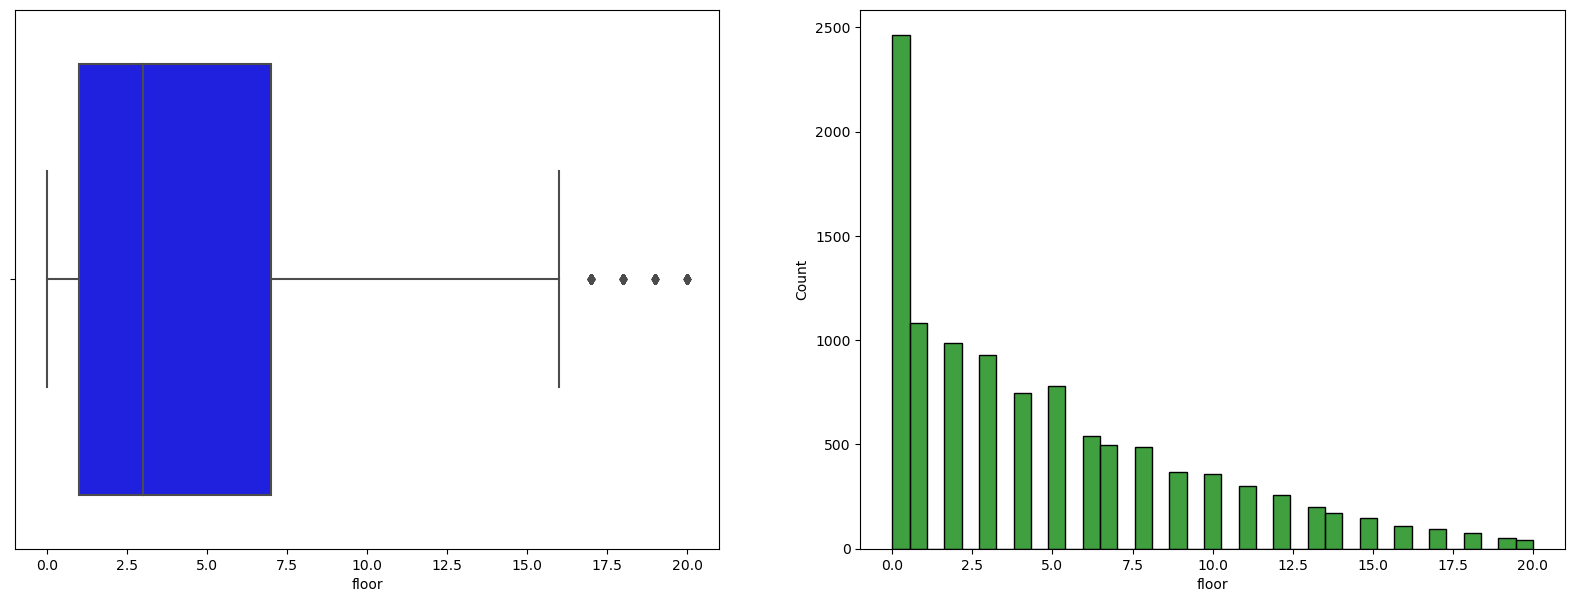

In [13]:
fig,ax= plt.subplots(1,2, figsize =(20,7))
sns.histplot(x = housing_data["floor"], ax = ax[1],color = 'g')
sns.boxplot(x = housing_data["floor"], ax = ax[0],color = 'b')
plt.show()

* Interpretation : Most of the floor values are less than 20.

## Level 2 Analysis : Bi-Variate Analysis

## CAT - CAT Analysis

### 1. Relationship between city and animal

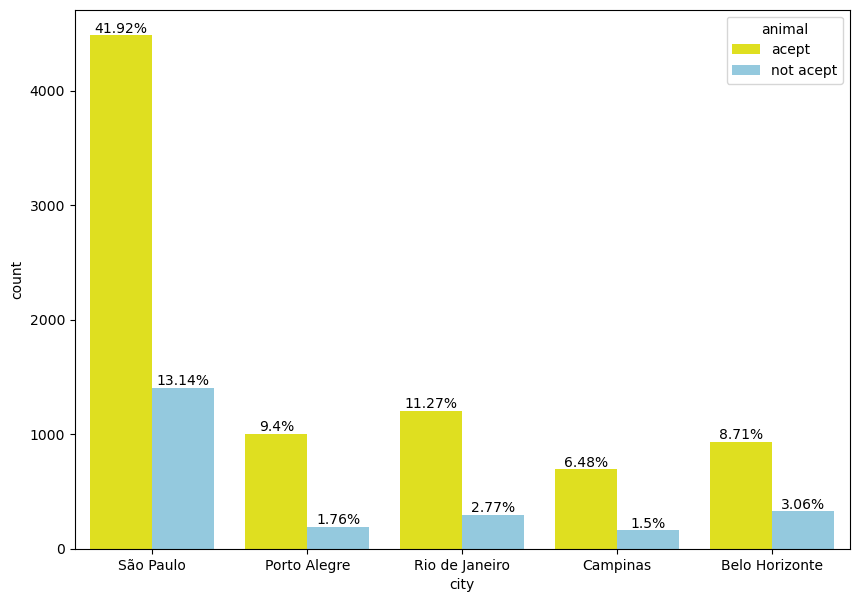

In [50]:
# City wise animal
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x='city', hue = 'animal', data = housing_data, palette={'acept': 'yellow', 'not acept': 'skyblue'} )
bar_percentage(ax,len(housing_data))

* Interpretation : 41% of the flats in Sao Paulo City allow pets which is maximum as compared to other cities.

### 2. Relationship between city and furniture

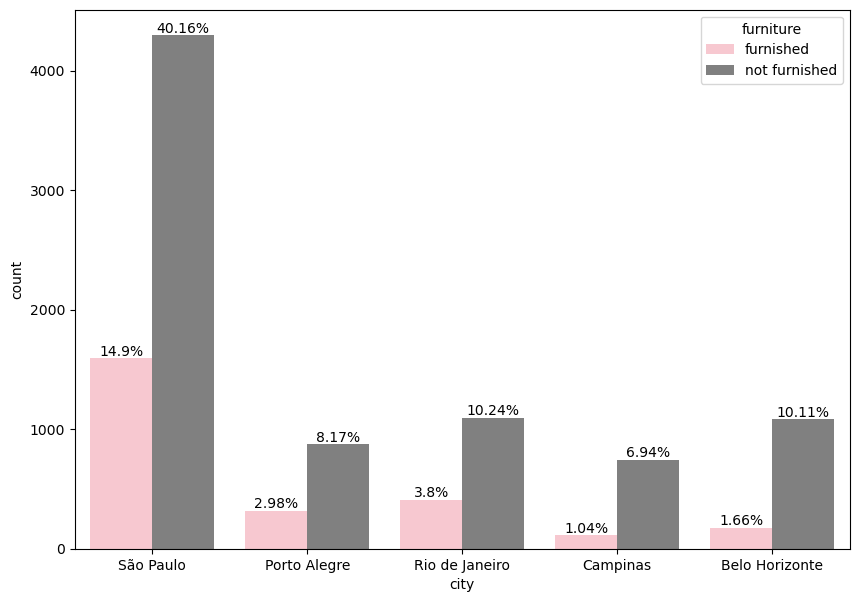

In [51]:
# City wise furniture
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x='city', hue = 'furniture', data = housing_data, palette={'furnished': 'pink', 'not furnished': 'grey'} )
bar_percentage(ax,len(housing_data))

* Interpretation : 40.16% of flats in Sao Paulo city are not furnished which is higher as compared to other cities.

### 3. Relationship between city and rooms

In [52]:
# Filter the data for rooms
rooms_filt = housing_data[(housing_data['rooms'] <= 6)]
rooms_filt

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


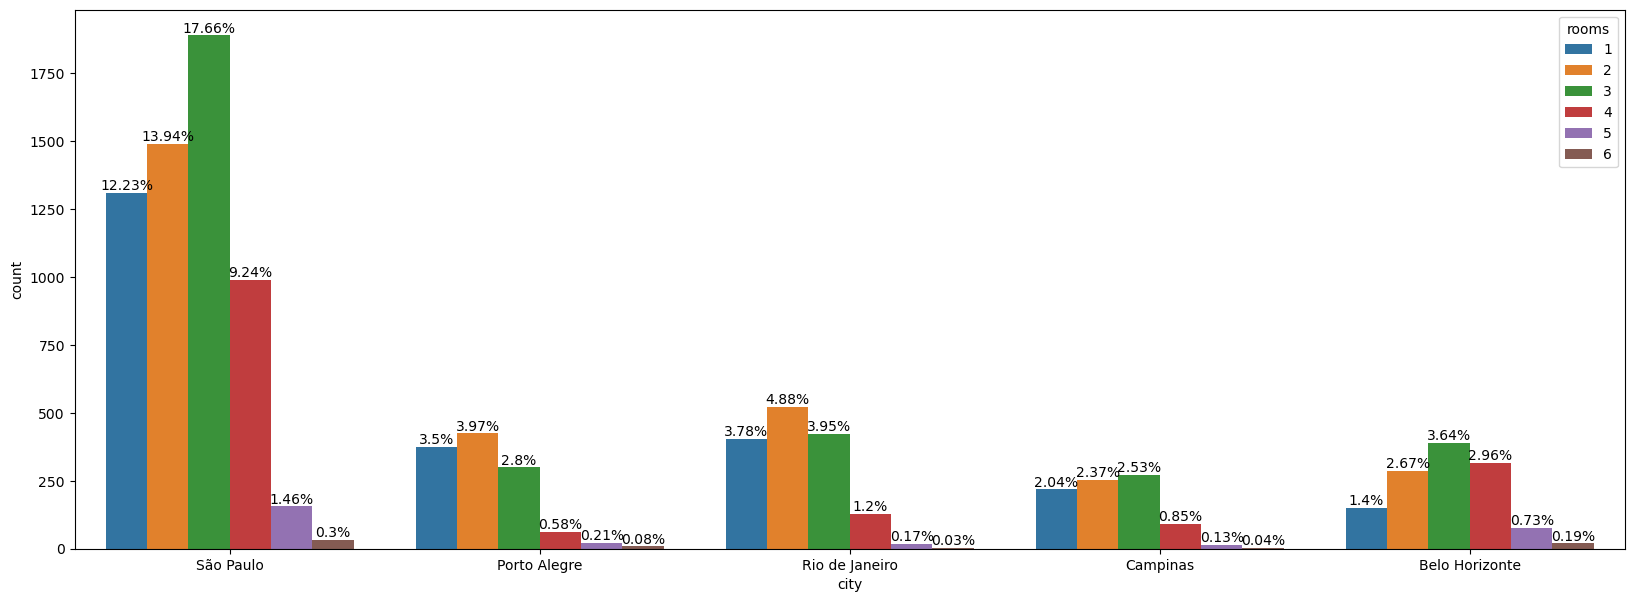

In [53]:
# City wise rooms
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x='city', hue = 'rooms', data = rooms_filt)
bar_percentage(ax,len(rooms_filt))

* Interpretation : Sao Paulo city has maximum variety of number of rooms as compared to other cities.

### 4. Relationship between city and bathrooms.

In [54]:
# Filter the bathroom data
bathroom_filt = housing_data[(housing_data['bathroom'] <= 6)]
bathroom_filt

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


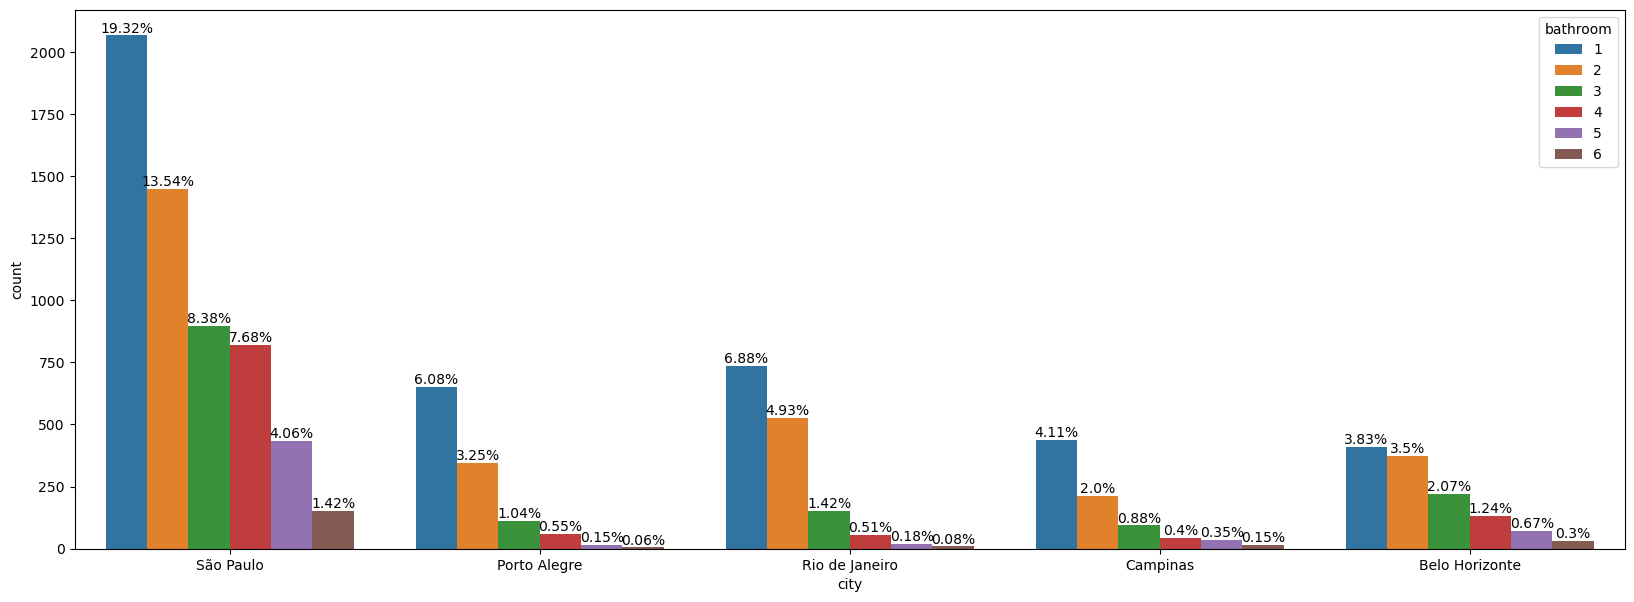

In [55]:
# City wise bathrooms
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x='city', hue = 'bathroom', data = bathroom_filt)
bar_percentage(ax,len(bathroom_filt))

* Interpretation : Sao Paulo city has maximum variety of number of bathrooms as compared to other cities.

### 5. Relationship between city and Parking Spaces

In [56]:
# Filter the parking space data
parking_filt = housing_data[(housing_data['parking spaces'] <= 6)]
parking_filt

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


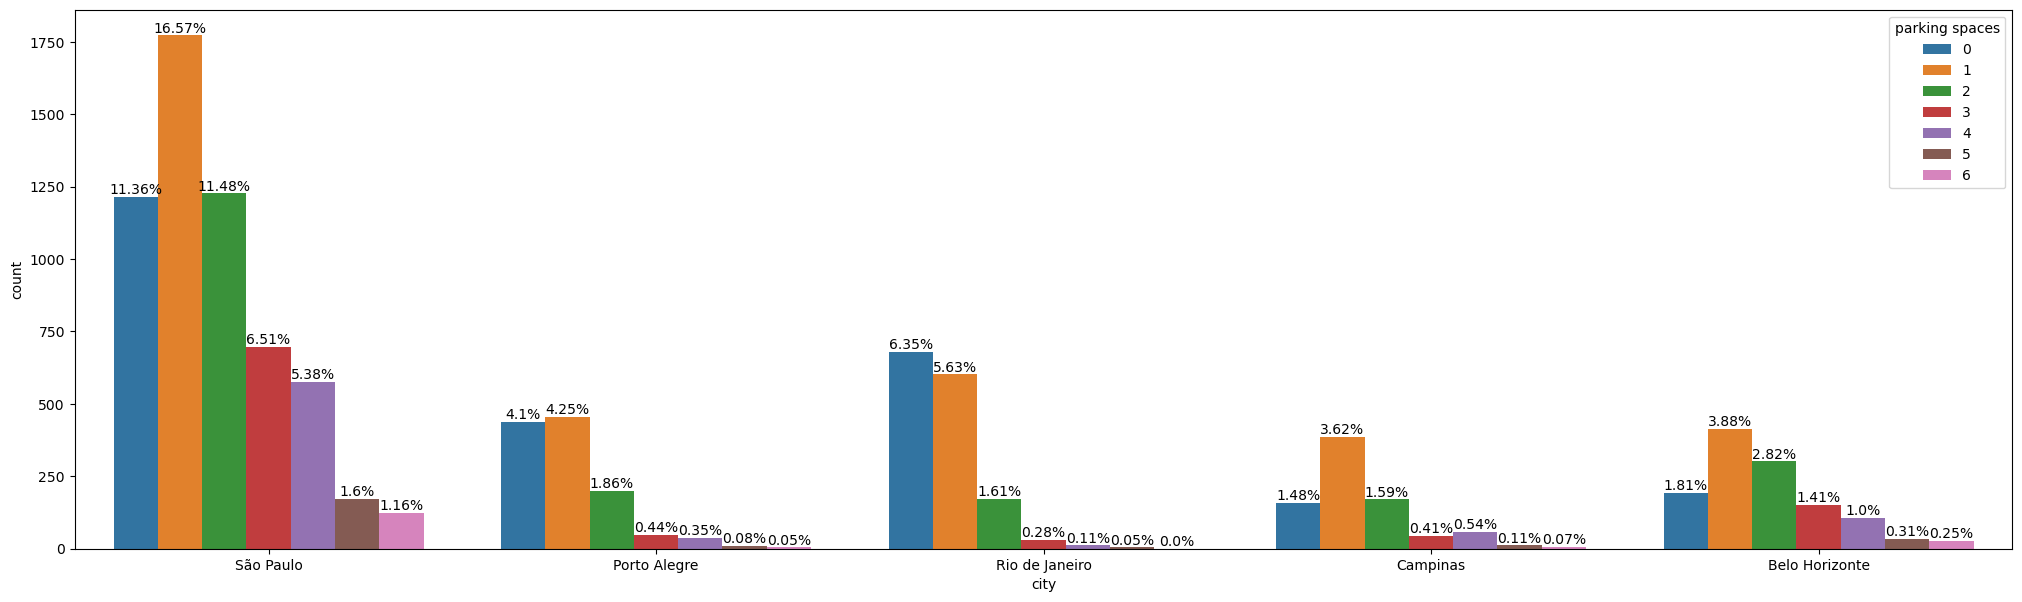

In [57]:
# City wise parking spaces
fig, ax = plt.subplots(figsize = (25,7))
ax = sns.countplot(x='city', hue = 'parking spaces', data = parking_filt)
bar_percentage(ax,len(parking_filt))

* Interpretation : Sao Paulo city has maximum variety of number of parking spaces as compared to other cities.

### 6. Relationship between furniture and animal

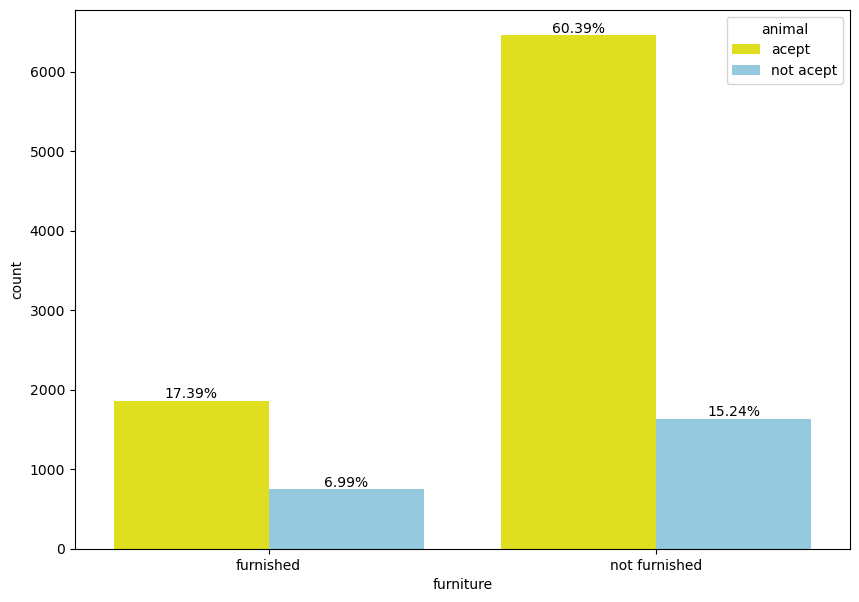

In [58]:
# Furniture wise animal
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x='furniture', hue = 'animal', data = housing_data, palette={'acept': 'yellow', 'not acept': 'skyblue'} )
bar_percentage(ax,len(housing_data))

* Interpretation : 60.39% percent of flats which are not furnished allow to keep pets.

## CAT - NUM Analysis

### 1. Relationship between city and area

In [46]:
filt_area = housing_data[(housing_data['area'] <= 10000)]
filt_area

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


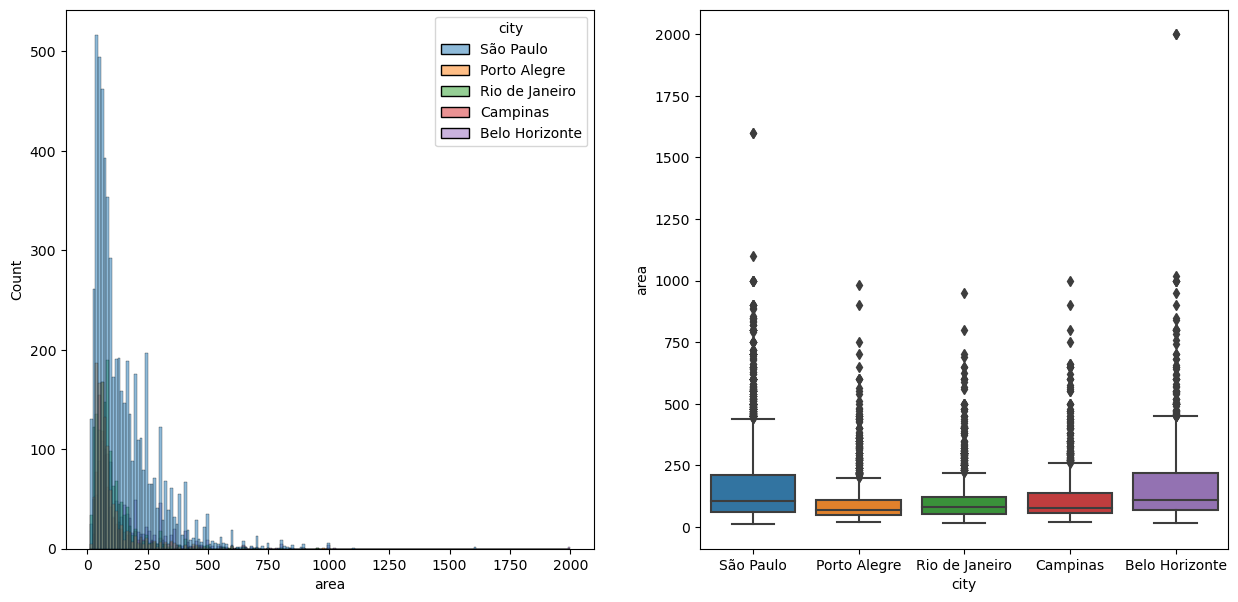

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = filt_area["area"], hue =  filt_area["city"], ax = ax[0])
sns.boxplot(y =  filt_area["area"], x =  filt_area["city"], ax = ax[1])
plt.show()

* Interpretation : Sao Paulo and Belo Horizonte appears to have maximum area as compared to other cities.

### 2. Relationship between city and hoa

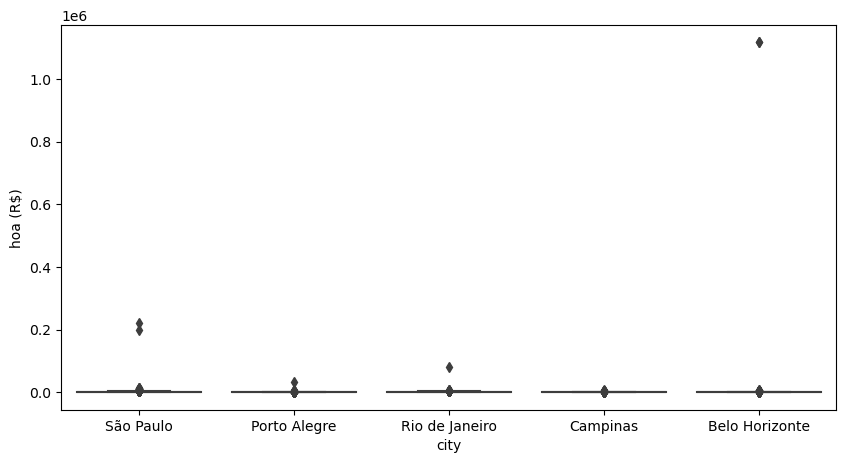

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(y=housing_data["hoa (R$)"], x=housing_data["city"])
plt.show()

* Interpretation : The city of Sao Paulo appears to have the highest HOA fees, while the city of Campinas appears to have the lowest HOA fees.

### 3. Relationship between city and rent

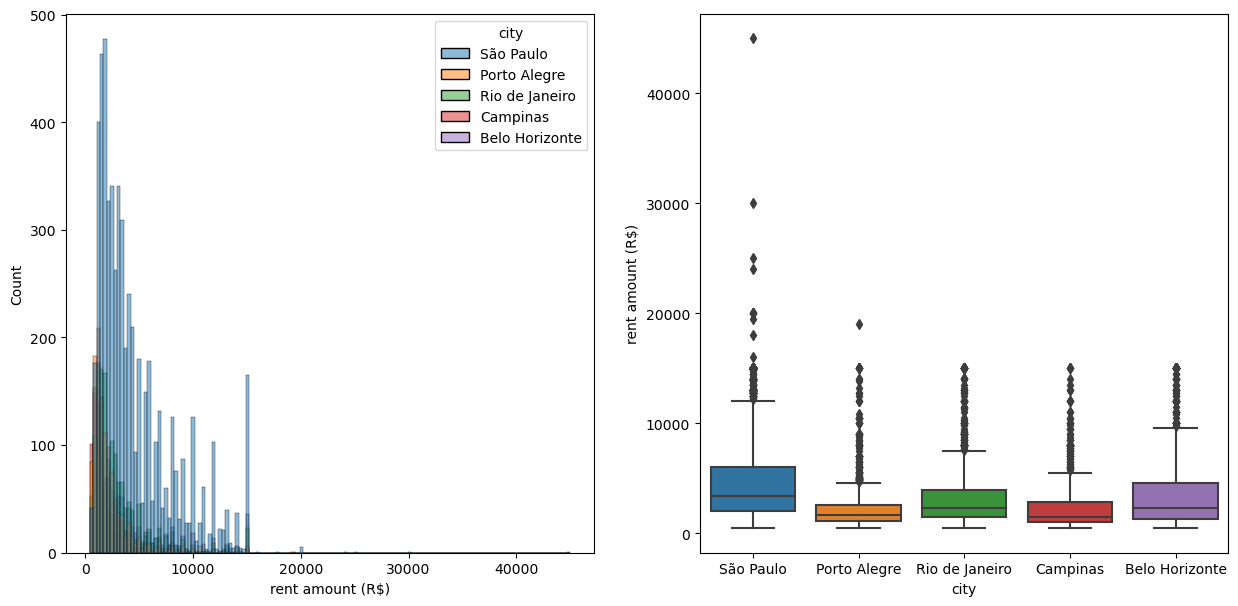

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = housing_data["rent amount (R$)"], hue = housing_data["city"], ax = ax[0])
sns.boxplot(y = housing_data["rent amount (R$)"], x = housing_data["city"], ax = ax[1])
plt.show()

* Interpretation : Most of the rent amount is less than 20,000. Sao Paulo appear to have generally higher rent than other cities.

### 4. Relationship between city and Property Tax

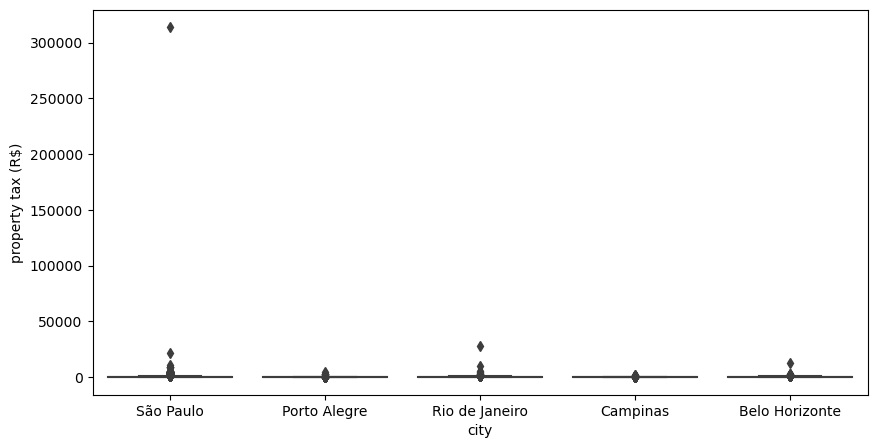

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(y=housing_data["property tax (R$)"], x=housing_data["city"])
plt.show()

* Interpretation : Rio de Janeiro has the highest property taxes, while Campinas has the lowest.

### 5. Relationship between city and Fire Insurance

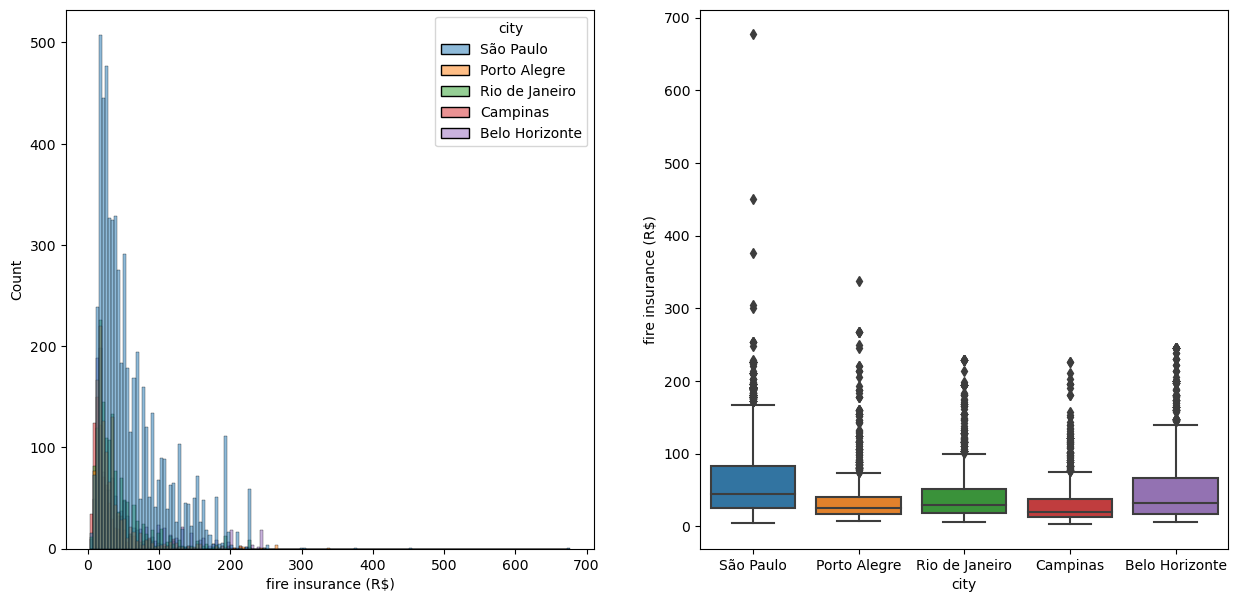

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = housing_data["fire insurance (R$)"], hue = housing_data["city"], ax = ax[0])
sns.boxplot(y = housing_data["fire insurance (R$)"], x = housing_data["city"], ax = ax[1])
plt.show()

* Interpretation : The city of Sao Paulo appears to have the highest fire insurance cost while the city of Campinas appears to have the lowest average cost.

### 6. Relationship between city and Total

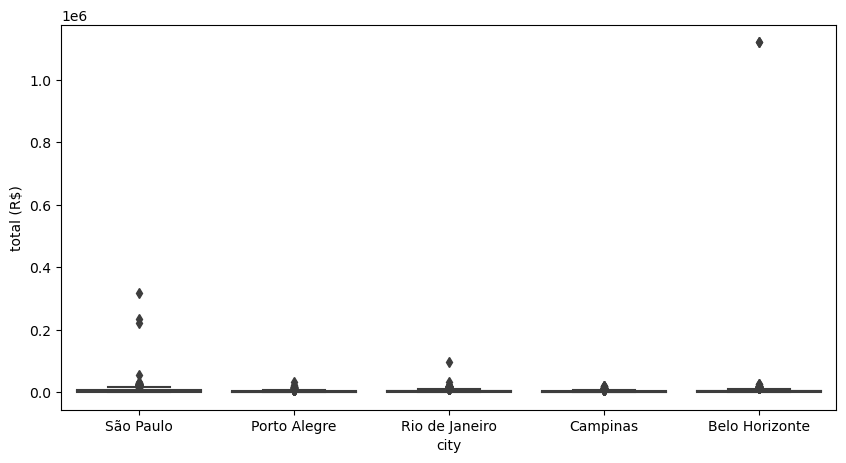

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(y=housing_data["total (R$)"], x=housing_data["city"])
plt.show()

* Interpretation : Sao Paulo has generally higher total amount and Belo Horizonte has the lowest total amount..

## NUM - NUM Analysis

### 1. Relationship between area and hoa

In [43]:
# Filtered the data for area and hoa
hoa_area = housing_data[(housing_data['area'] <= 1250) & (housing_data['hoa (R$)']<=8000)]
hoa_area

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


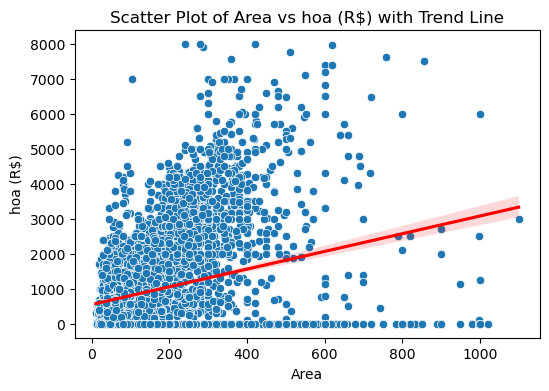

In [46]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="area", y="hoa (R$)", data=hoa_area)
sns.regplot(x="area", y="hoa (R$)", data=hoa_area, scatter=False, color='red')  # Adding the trend line
plt.xlabel("Area")
plt.ylabel("hoa (R$)")
plt.title("Scatter Plot of Area vs hoa (R$) with Trend Line")
plt.show()

* Interpretation :The data points in the scatter plot show a weak positive correlation between the area of a house and its HOA fees. This means that there is a slight upward trend, with larger houses having slightly higher HOA fees. However, the data points are spread out, so there is a lot of variability. Some large houses have lower HOA fees than some small houses.

### 2. Relationship between area and rent

In [57]:
# Filtered the data for area and rent
rent_area = housing_data[(housing_data['area'] <= 1250) & (housing_data['rent amount (R$)']<=30000)]
rent_area

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


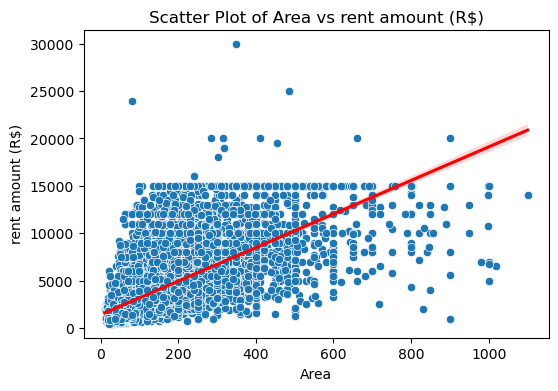

In [58]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="area", y="rent amount (R$)", data=rent_area)
sns.regplot(x="area", y="rent amount (R$)", data= rent_area, scatter=False, color='red')  # Adding the trend line
plt.xlabel("Area")
plt.ylabel("rent amount (R$)")
plt.title("Scatter Plot of Area vs rent amount (R$)")
plt.show()

* Interpretation : The data points in the scatter plot show a weak positive correlation between the area and rent amount. This means that there is a slight upward trend, with houses with more area having slightly higher rent. However, the data points are spread out, so there is a lot of variability. Some houses with more area have lower rent than some houses with less area.

### 3. Relationship between area and property tax

In [54]:
# Filtered the data for area and property tax
ptax_area = housing_data[(housing_data['area'] <= 1250) & (housing_data['property tax (R$)']<=20000)]
ptax_area

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


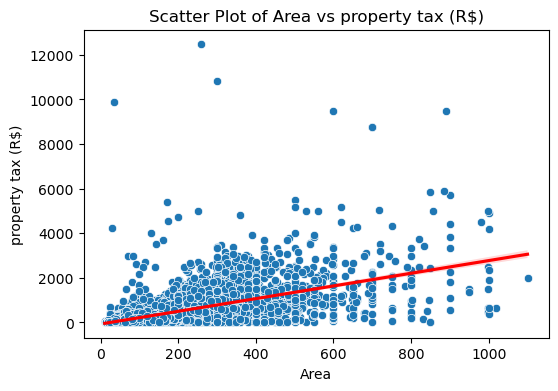

In [59]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="area", y="property tax (R$)", data=ptax_area)
sns.regplot(x="area", y="property tax (R$)", data=ptax_area, scatter=False, color='red')  # Adding the trend line
plt.xlabel("Area")
plt.ylabel("property tax (R$)")
plt.title("Scatter Plot of Area vs property tax (R$)")
plt.show()

* Interpretation : The data points in the scatter plot show a weak positive correlation between the area of a property and its property tax. This means that there is a slight upward trend, with larger properties having slightly higher property taxes. However, the data points are spread out, so there is a lot of variability. Some large properties have lower property taxes than some small properties.

### 4. Relationship between area and fire insurance

In [52]:
# Filtered the data for area and fire insurance 
ftax_area = housing_data[(housing_data['area'] <= 1250) & (housing_data['fire insurance (R$)']<=450)]
ftax_area

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


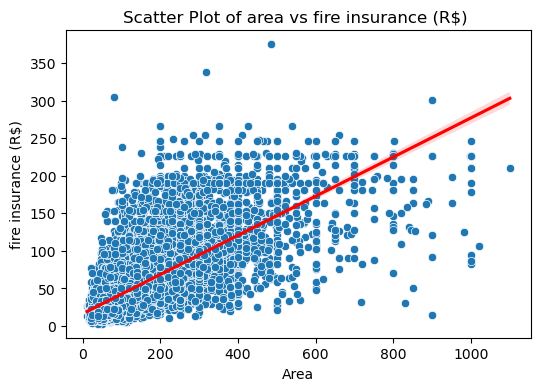

In [60]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="area", y="fire insurance (R$)", data=ftax_area)
sns.regplot(x="area", y="fire insurance (R$)", data=ftax_area, scatter=False, color='red')  # Adding the trend line
plt.xlabel("Area")
plt.ylabel("fire insurance (R$)")
plt.title("Scatter Plot of area vs fire insurance (R$) ")
plt.show()

* Interpretation : The data points in the scatter plot show a weak positive correlation between the area and fire insurance. This means that there is a slight upward trend, with houses with more area having slightly higher fire insurance costs. However, the data points are spread out, so there is a lot of variability. Some houses with more area have lower fire insurance costs than some areas with less area.

### 5. Relationship between area and total

In [49]:
# Filtered the data for area and total 
total_area = housing_data[(housing_data['area'] <= 1250) & (housing_data['total (R$)']<=55000)]
total_area

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


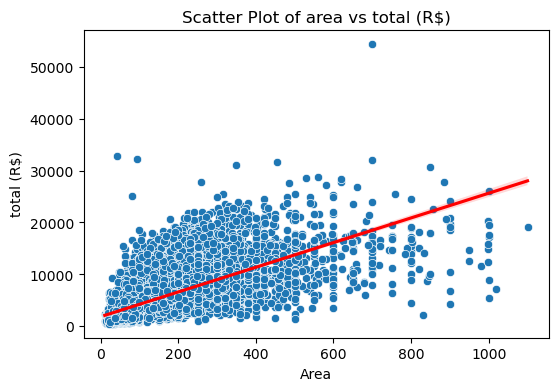

In [61]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="area", y="total (R$)", data=total_area)
sns.regplot(x="area", y="total (R$)", data=total_area, scatter=False, color='red')  # Adding the trend line
plt.xlabel("Area")
plt.ylabel("total (R$)")
plt.title("Scatter Plot of area vs total (R$)")
plt.show()

* Interpretation : The data points in the scatter plot show a weak positive correlation between the area and total amount. This means that there is a slight upward trend, with areas with more area having slightly high total amount. However, the data points are spread out, so there is a lot of variability. Some houses with more area have lower total amount than some areas with less area.

##  Level 3 Analysis : Multivariate Analysis

### 1) For Bachelors

* Question : 
* A Bachelor named Jim wants to relocate to a new city to live and work remotely. The requirements given by Jim are as follows : 
* 1. The city should not be expensive.
* 2. The flat should be 1Bhk(1bedroom + 1bathroom), furnished and should be in low-rise building.
* 3. There should be 1 parking space.
* 4. The pets should not be allowed to keep.
* 5. The carpet area should be between 20-40 square meters.
* 6. The maximum rent he can afford is 6000.
* 7. There should be no HOA ( Homeowner Association Tax)
* 8. The total amount including all taxes(property tax & fire insurance) and rent should not be greater than 8000.

In [5]:
# Filter out the cities which are expensive
a = housing_data[(housing_data['city'] != 'São Paulo') & (housing_data['city'] != 'Rio de Janeiro')]
a

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


In [17]:
bachelor = a[(a['area'].between(20, 40)) & 
                         (a['bathroom'] == 1) & 
                         (a['rooms'] == 1) & 
                         (a['parking spaces'] == 1) &
                         (a['furniture'] == 'furnished') & 
                         (a['animal'] == 'not acept') & 
                         (a['floor'] <= 5) &  
                         (a['hoa (R$)'] == 0) &
                         (a['rent amount (R$)'] <= 6000) & 
                         (a['total (R$)'] < 8000)]
bachelor

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
910,Belo Horizonte,40,1,1,1,2,not acept,furnished,0,970,0,13,983
920,Belo Horizonte,40,1,1,1,2,not acept,furnished,0,970,0,13,983
2498,Belo Horizonte,22,1,1,1,1,not acept,furnished,0,1500,0,20,1520
3851,Porto Alegre,35,1,1,1,1,not acept,furnished,0,1400,0,21,1421
4689,Belo Horizonte,30,1,1,1,2,not acept,furnished,0,860,0,12,872
5588,Belo Horizonte,22,1,1,1,1,not acept,furnished,0,1500,0,20,1520
8213,Belo Horizonte,22,1,1,1,1,not acept,furnished,0,1500,0,20,1520
9761,Porto Alegre,30,1,1,1,1,not acept,furnished,0,1330,0,20,1350
10208,Campinas,35,1,1,1,0,not acept,furnished,0,1000,0,16,1016


In [22]:
bachelor_p = bachelor.groupby(['city'])['city'].count()
bachelor_p

city
Belo Horizonte    6
Campinas          1
Porto Alegre      2
Name: city, dtype: int64

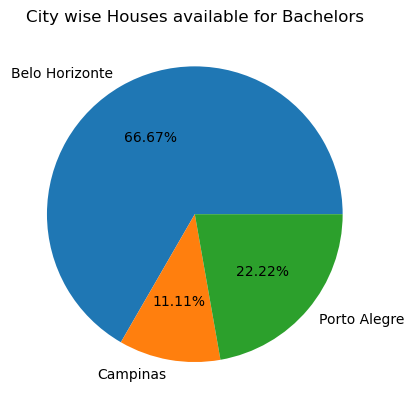

In [23]:
plt.pie(bachelor_p.values, labels = bachelor_p.index, autopct = '%.2f%%')
plt.title('City wise Houses available for Bachelors')
plt.show()

* Interpretation : According to requirement provided by the bachelor, there are three options of the cities for him. But 'Belo Horizonte' has more house options as compared to other two.

### 2) For Mid Sized Family

* Question : 
* A mid sized family wants to relocate to a new city to live and work remotely The requirements given by family are as follows : 
* 1. The city should not be expensive.
* 2. The flat should be 2Bhk or 3Bhk(2/3bedroom + 2bathroom), well furnished and should be in high-rise building.
* 3. There should be 2 parking space.
* 4. The pets should be allowed to keep.
* 5. The carpet area should be between 60-100 square meters.
* 6. The maximum rent they can afford is 15000.
* 7. The maximum HOA ( Homeowner Association Tax) should be less than 3000.
* 8. The total amount including all taxes(property tax & fire insurance) and rent should not be greater than 20000.

In [17]:
mid_size = a[(a['area'].between(60, 100)) & 
                        (a['bathroom'] == 2) & 
                        (a['rooms'].between (2,3)) & 
                        (a['parking spaces'] == 2) &
                        (a['furniture'] == 'furnished') & 
                        (a['animal'] == 'acept') & 
                        (a['floor'] > 10) & 
                        (a['hoa (R$)'] <= 3000) &
                        (a['rent amount (R$)'] < 15000) & 
                        (a['total (R$)'] < 20000)]
mid_size

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
196,Campinas,85,3,2,2,16,acept,furnished,550,3300,150,42,4042
1340,Belo Horizonte,80,2,2,2,12,acept,furnished,1100,4800,300,64,6264
5810,Campinas,92,3,2,2,13,acept,furnished,720,3200,139,41,4100
7656,Campinas,74,3,2,2,11,acept,furnished,477,1600,0,21,2098
9073,Porto Alegre,74,3,2,2,13,acept,furnished,402,2300,58,34,2794


In [18]:
midsize_p = mid_size.groupby(['city'])['city'].count()
midsize_p

city
Belo Horizonte    1
Campinas          3
Porto Alegre      1
Name: city, dtype: int64

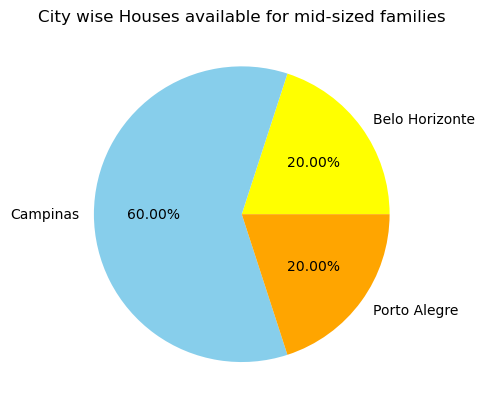

In [19]:
colors = ['yellow', 'skyblue', 'orange', 'purple']

plt.pie(midsize_p.values, labels = midsize_p.index, autopct = '%.2f%%', colors=colors)
plt.title('City wise Houses available for mid-sized families')
plt.show()

* Interpretation : According to the requirements provided by the mid-sized family,there are three available options of the cities .But 'Campinas' has more house options as compared to other two. It is suggested that they should move to city 'Campinas'.

### 3) For Large Sized Family

* Question : 
* A large sized family wants to relocate to a new city to live and work remotely The requirements given by family are as follows : 
* 1. The city should not be expensive.
* 2. The flat should be 4 Bhk(3/4bedrooms + 3/4bathroom), well furnished and should be in low-rise building.
* 3. There should be 3/4 parking space.
* 4. The pets should be allowed to keep.
* 5. The carpet area should be between 100-200 square meters.
* 6. The maximum rent they can afford is 30000.
* 7. The maximum HOA ( Homeowner Association Tax) should be less than 5000.
* 8. The total amount including all taxes(property tax & fire insurance) and rent should not be greater than 60000.

In [12]:
large_size = a[(a['area'].between(100, 200)) & 
                        (a['bathroom'].between (3,4)) & 
                        (a['rooms'].between (3,4)) & 
                        (a['parking spaces'].between(3,4)) &
                        (a['furniture'] == 'furnished') & 
                        (a['animal'] == 'acept') & 
                        (a['floor'] > 5) & 
                        (a['hoa (R$)'] <= 5000) &
                        (a['rent amount (R$)'] < 30000) & 
                        (a['total (R$)'] < 60000)]
large_size

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
1378,Porto Alegre,199,3,4,3,7,acept,furnished,900,8750,334,128,10110
1596,Belo Horizonte,190,4,3,3,10,acept,furnished,1384,4800,357,64,6605
2944,Belo Horizonte,200,4,3,3,7,acept,furnished,1350,7900,700,106,10060
3659,Belo Horizonte,154,4,4,3,12,acept,furnished,1670,8500,153,114,10440
6807,Porto Alegre,160,3,3,3,8,acept,furnished,2200,8950,621,131,11900
7571,Belo Horizonte,120,3,4,3,8,acept,furnished,2077,6000,726,80,8883
9591,Belo Horizonte,159,3,3,3,7,acept,furnished,2000,7100,150,95,9345


In [13]:
largesize_p = large_size.groupby(['city'])['city'].count()
largesize_p

city
Belo Horizonte    5
Porto Alegre      2
Name: city, dtype: int64

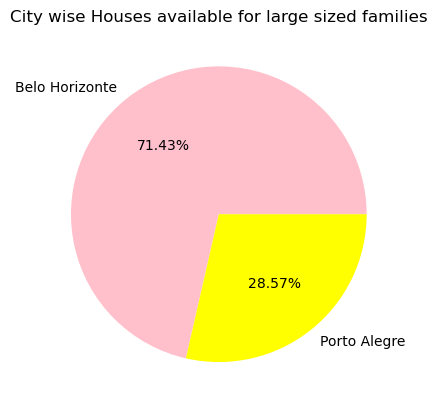

In [21]:
colors = ['pink', 'yellow', 'green', 'orange', 'purple'] 

plt.pie(largesize_p.values, labels=largesize_p.index, autopct='%.2f%%', colors=colors)
plt.title('City wise Houses available for large sized families')
plt.show()

* Interpretation : According to the requirements provided by the large-sized family, there are two available options of cities. But 'Belo Horizonte' has more house options as compared to the other one. It is suggested that they should move to city 'Belo Horizonte'.